# **PROYECTO DE PREDICCION DE HIPERTENSION ARTERIAL**


### Problemática de Machine Learning

Predecir si un paciente tiene probabilidades de sufrir <i>hipertensión arterial</i> en función de parámetros de entrada como sexo, edad, diversas enfermedades, tabaquismo, entre otros.

1. **Tipo:** Aprendizaje supervisado
2. **Métricas de rendimiento:**
   - Exactitud
   - Precisión
   - Recall
   - F1-score

### Sobre el dataset

- **Fuente:** https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/data
- **Notebook de indicadores** https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook

### Información de los atributos

#### Variable dependiente:

- **Hypertension:** Target, 0 cuando el paciente es sano y 1 cuando es hipertenso.

#### Variables independientes:

1. **Age:** Grupo de edad del paciente [1 - 13] - (>18 años).
2. **Sex:** 0 si el paciente es masculino y 1 si es femenino.
3. **BMI:** Índice de Masa Corporal.
4. **GenHlth:** Percepción del estado de salud, [Excelente = 1] [Muy bueno = 2] [Bueno = 3] [Regular = 4] [Deficiente = 5]
5. **MentHlth:** Días percibidos en que la salud mental no fue tan buena.
6. **Salud Física:** Días percibidos en que la salud física no fue tan buena.
7. **DiffWalk:** Dificultad para caminar o subir escaleras, [No = 0] [Si = 1].
8. **Fruits:** Consumo de frutas 1 o más veces al día, [No = 0] [Si = 1].
9. **Veggies:** Consumo de verduras 1 o más veces al día, [No = 0] [Si = 1].
10. **Smoker:** Consumo cigarros, [No = 0] [Si = 1].
11. **HvyAlcoholConsump:** Alto consumo de alcohol, [No = 0] [Si = 1].
12. **PhysActivity:** Actividad física en los últimos 30 días, [No = 0] [Si = 1].
13. **HighChol:** Profesional médico indico si tiene colesterol alto, [No = 0] [Si = 1].
14. **CholCheck:** Control de colesterol en los últimos 5 años, [No = 0] [Si = 1].
15. **Diabetes:** Estado de diabetes, [Sin diabetes = 0] [Prediabetes = 1] [Diabetes = 2]
16. **Stroke:** Paciente padeció un accidente cerebrovascular (acv), [No = 0] [Si = 1].
17. **HeartDiseaseorAttack:** Paciente padeció de una enfermedad cardiovascular o infarto de miocardio, [No = 0] [Si = 1].


## Importación de Librerías y datos


In [1]:
## Importar bibliotecas necesarias
import time  # Importar la biblioteca time para mediciones de tiempo
import pandas as pd  # Importar pandas para manejo de datos
import numpy as np  # Importar numpy para operaciones numéricas
import matplotlib as mpl  # Importar matplotlib para visualización de datos
import matplotlib.pyplot as plt  # Importar pyplot de matplotlib para trazar gráficos
import seaborn as sns  # Importar seaborn para gráficos estadísticos
from matplotlib import pyplot  # Importar pyplot de matplotlib para trazar gráficos
import warnings  # Importar warnings para gestionar advertencias
import pickle  # Importar pickle para guardar modelos entrenados
warnings.filterwarnings('ignore')  # Ignorar las advertencias

## Medidas de evaluación
from sklearn.model_selection import train_test_split  # Importar train_test_split para dividir los datos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Importar métricas de evaluación
from imblearn.over_sampling import SMOTE  # Importar SMOTE para el manejo de datos desbalanceados
import time  # Importar time para mediciones de tiempo

## Bibliotecas de Aprendizaje Automático
from sklearn.ensemble import RandomForestClassifier  # Importar RandomForestClassifier para clasificación con bosques aleatorios
from sklearn.neighbors import KNeighborsClassifier  # Importar KNeighborsClassifier para clasificación con k vecinos más cercanos
from sklearn.tree import DecisionTreeClassifier  # Importar DecisionTreeClassifier para clasificación con árboles de decisión
from sklearn.linear_model import LogisticRegression  # Importar LogisticRegression para clasificación con regresión logística
from xgboost import XGBClassifier  # Importar XGBClassifier para clasificación con XGBoost

print('Librerías importadas')

Librerías importadas


In [2]:
# Lee el archivo CSV
DF = pd.read_csv('/PrediHipertension/dataset/dataset_hypertension.csv')
print ('Forma inicial del DataFrame: ' , DF.shape)
# Define el nombre de la columna que deseas mover al último lugar y realiza la operación
columna_a_mover = 'HighBP'
if columna_a_mover in DF.columns:
    DF = DF[[col for col in DF.columns if col != columna_a_mover] + [columna_a_mover]].rename(columns={'HighBP': 'Hypertension'})

# Define las columnas a eliminar y elimínalas si están presentes
columnas_a_eliminar = ['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income']
DF = DF.drop(columns=[col for col in columnas_a_eliminar if col in DF.columns])

# Define el orden deseado de las columnas y reordena el DataFrame según el nuevo orden
nuevo_orden = ['Age', 'Sex', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'HighChol', 'CholCheck', 'Diabetes', 'Stroke', 'HeartDiseaseorAttack', 'Hypertension']
DF = DF[nuevo_orden]

# Imprime la forma del DataFrame y muestra las primeras 10 filas
print('Forma final del DataFrame:', DF.shape)

# Mostrar 5 datos aleatorios
DF.sample(5)

Forma inicial del DataFrame:  (253680, 22)
Forma final del DataFrame: (253680, 18)


,Age,Sex,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Fruits,Veggies,Smoker,HvyAlcoholConsump,PhysActivity,HighChol,CholCheck,Diabetes,Stroke,HeartDiseaseorAttack,Hypertension
189460,10.0,0.0,27.0,2.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
209793,11.0,0.0,46.0,5.0,0.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0
192504,11.0,1.0,24.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
18356,1.0,1.0,21.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
242954,10.0,0.0,24.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Procesamiento de datos


### Verificación de valores nulos


In [3]:
DF.isnull().sum()

Age                     0
Sex                     0
BMI                     0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Fruits                  0
Veggies                 0
Smoker                  0
HvyAlcoholConsump       0
PhysActivity            0
HighChol                0
CholCheck               0
Diabetes                0
Stroke                  0
HeartDiseaseorAttack    0
Hypertension            0
dtype: int64

### Verificación de datos duplicados


In [4]:
DF.duplicated().sum()

64159

#### Información de las columnas del DataFrame


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   253680 non-null  float64
 1   Sex                   253680 non-null  float64
 2   BMI                   253680 non-null  float64
 3   GenHlth               253680 non-null  float64
 4   MentHlth              253680 non-null  float64
 5   PhysHlth              253680 non-null  float64
 6   DiffWalk              253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   Smoker                253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  PhysActivity          253680 non-null  float64
 12  HighChol              253680 non-null  float64
 13  CholCheck             253680 non-null  float64
 14  Diabetes              253680 non-null  float64
 15  

### Información sobre los tipos de datos de las variables


In [6]:
DF.dtypes

Age                     float64
Sex                     float64
BMI                     float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Fruits                  float64
Veggies                 float64
Smoker                  float64
HvyAlcoholConsump       float64
PhysActivity            float64
HighChol                float64
CholCheck               float64
Diabetes                float64
Stroke                  float64
HeartDiseaseorAttack    float64
Hypertension            float64
dtype: object

### Información estadistica de las variables


In [7]:
DF.describe()

,Age,Sex,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Fruits,Veggies,Smoker,HvyAlcoholConsump,PhysActivity,HighChol,CholCheck,Diabetes,Stroke,HeartDiseaseorAttack,Hypertension
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,8.032119,0.440342,28.382364,2.511392,3.184772,4.242081,0.168224,0.634256,0.811420,0.443169,0.056197,0.756544,0.424121,0.962670,0.296921,0.040571,0.094186,0.429001
std,3.054220,0.496429,6.608694,1.068477,7.412847,8.717951,0.374066,0.481639,0.391175,0.496761,0.230302,0.429169,0.494210,0.189571,0.698160,0.197294,0.292087,0.494934
min,1.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.000000,27.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,1.000000,31.000000,3.000000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,13.000000,1.000000,98.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


### Cambio de tipo de dato


In [8]:
# Definir el nuevo orden de las variables
variables = nuevo_orden
Variables_enteras = ['Age', 'Sex', 'GenHlth', 'MentHlth', 
                     'PhysHlth', 'DiffWalk', 'Fruits', 
                     'Veggies', 'Smoker', 'HvyAlcoholConsump', 
                     'PhysActivity', 'HighChol', 'CholCheck', 
                     'Diabetes', 'Stroke', 'HeartDiseaseorAttack', 
                     'Hypertension']
variables_decimales = ['BMI']

# Convertir características a los tipos de datos requeridos
DF[Variables_enteras] = DF[Variables_enteras].astype(np.int8)

# Mostrar la información del nuevo DataFrame
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   253680 non-null  int8   
 1   Sex                   253680 non-null  int8   
 2   BMI                   253680 non-null  float64
 3   GenHlth               253680 non-null  int8   
 4   MentHlth              253680 non-null  int8   
 5   PhysHlth              253680 non-null  int8   
 6   DiffWalk              253680 non-null  int8   
 7   Fruits                253680 non-null  int8   
 8   Veggies               253680 non-null  int8   
 9   Smoker                253680 non-null  int8   
 10  HvyAlcoholConsump     253680 non-null  int8   
 11  PhysActivity          253680 non-null  int8   
 12  HighChol              253680 non-null  int8   
 13  CholCheck             253680 non-null  int8   
 14  Diabetes              253680 non-null  int8   
 15  

## Análisis exploratorio de datos


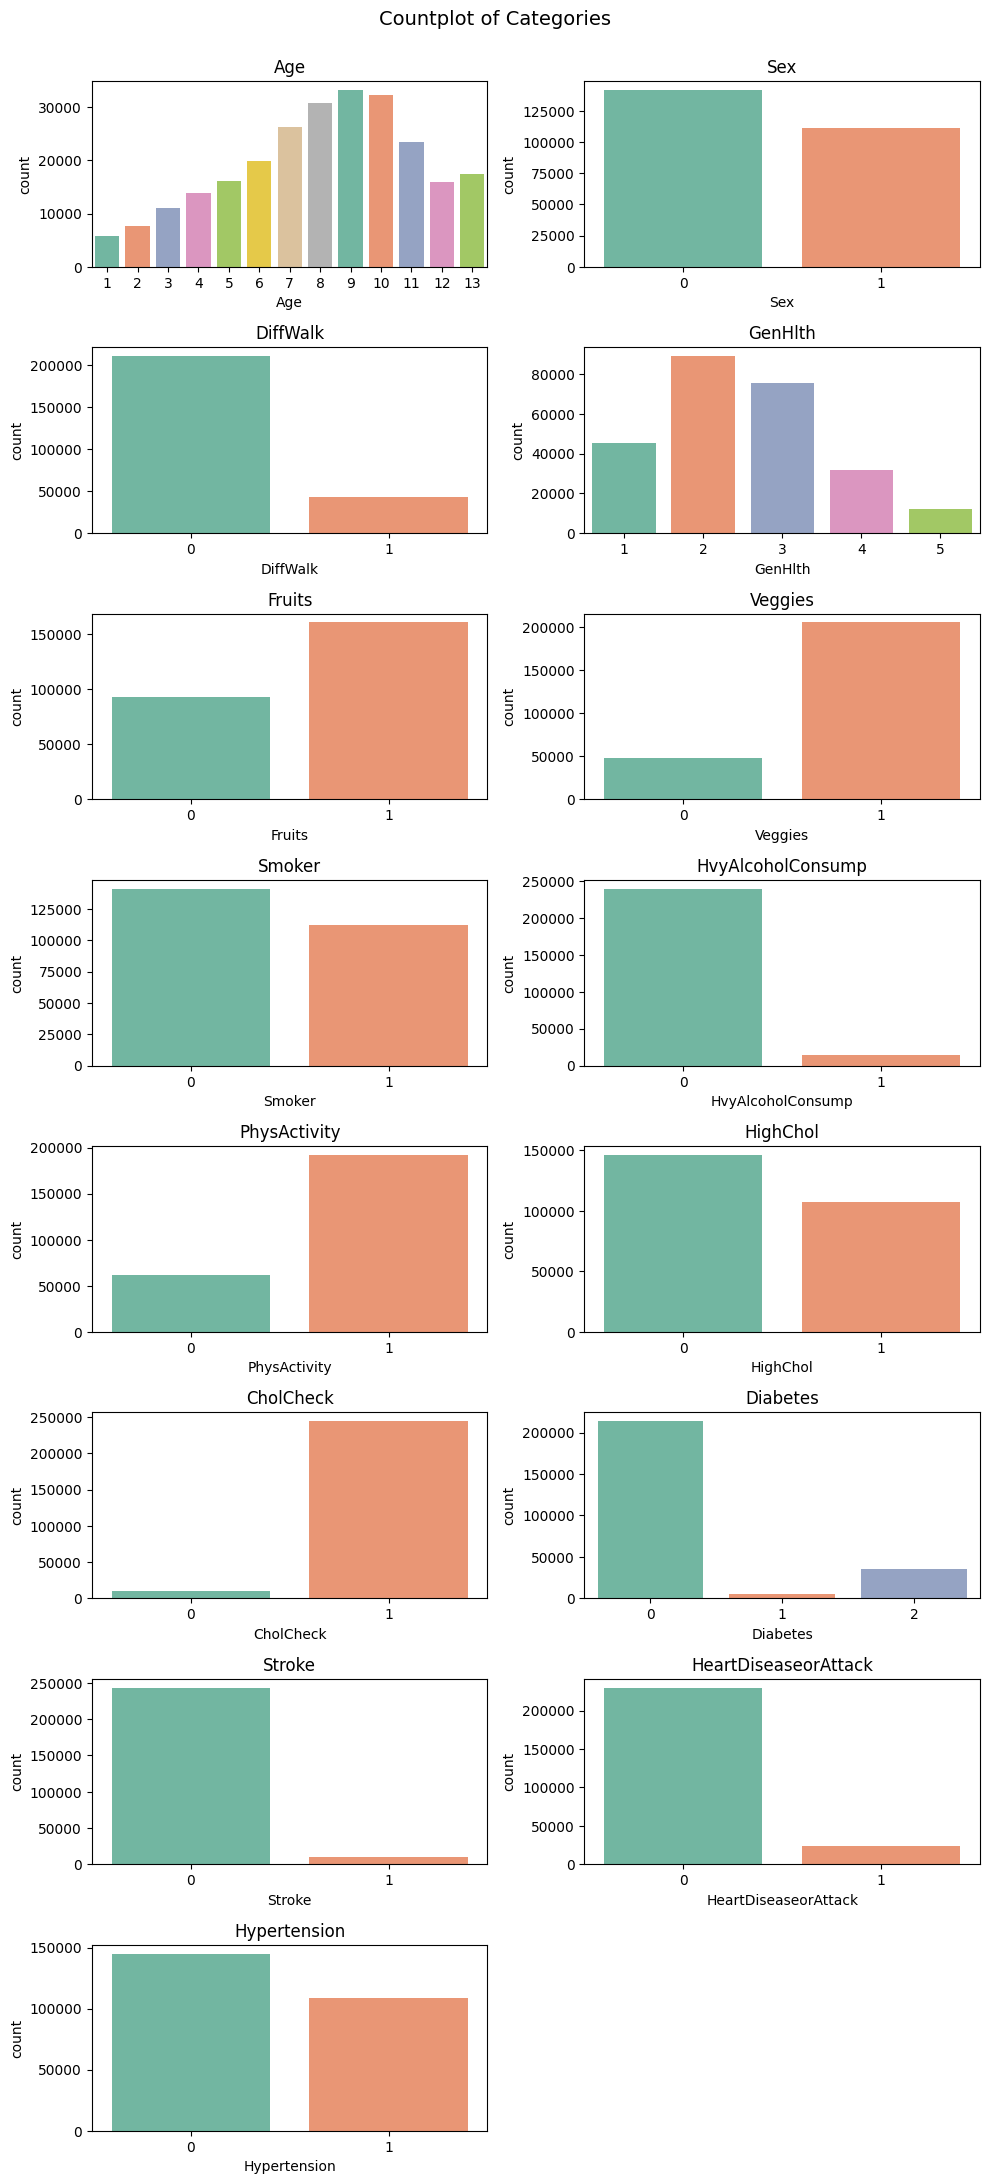

In [9]:
# Definir los colores que quieres usar
custom_palette = sns.color_palette("Set2")

# Lista de columnas
col = ['Age', 'Sex','DiffWalk', 'GenHlth', 'Fruits',
       'Veggies', 'Smoker', 'HvyAlcoholConsump',
       'PhysActivity', 'HighChol', 'CholCheck',
       'Diabetes','Stroke','HeartDiseaseorAttack',
       'Hypertension']

# Crear el gráfico
plt.figure(figsize=(10, 40))
for i,column in enumerate(col):
    plt.subplot(len(col), 2, i+1)
    plt.suptitle("Countplot of Categories", fontsize=14, x=0.5, y=1)
    sns.countplot(data=DF, x=column, palette=custom_palette)
    plt.title(f"{column}")
    plt.tight_layout()

# Mostrar los gráficos
plt.show()

#### Cantidad de pacientes sanos e hipertensos


Tienen Hipertensión: 108829
No tienen Hipertensión: 144851


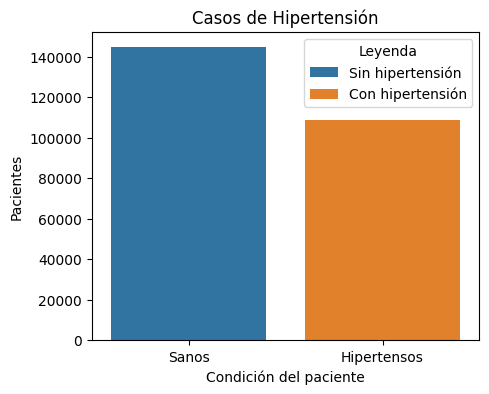

In [10]:
# Cantidad de pacientes con y sin hipertensión
hypertension_counts = DF['Hypertension'].value_counts()
print('Tienen Hipertensión:', hypertension_counts[1])
print('No tienen Hipertensión:', hypertension_counts[0])

# Establece el tamaño de la figura
plt.figure(figsize=(5, 4))

# Gráfico de barras para comparar pacientes hipertensos y no hipertensos
sns.countplot(data=DF, x='Hypertension', hue='Hypertension')
plt.title('Casos de Hipertensión')
plt.xlabel('Condición del paciente')
plt.xticks(ticks=[0, 1], labels=['Sanos', 'Hipertensos'])
plt.ylabel('Pacientes')
plt.legend(title='Leyenda', labels=['Sin hipertensión', 'Con hipertensión'])

#### Influencia de la edad con la hipertension


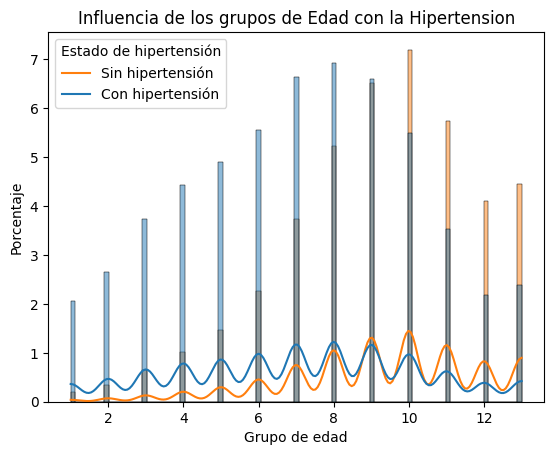

In [11]:
# Tramar un histograma para visualizar la distribución de la edad con respecto a la hipertensión
# x='Age' indica la variable de interés que se distribuirá en el histograma
# hue='Hypertension' permite diferenciar los grupos de hipertensión en el histograma
# kde=True agrega una estimación de la densidad del núcleo a la trama
# stat='percent' establece el estadístico para la altura de la barra como porcentaje
sns.histplot(data=DF, x='Age', hue='Hypertension', kde=True, stat='percent')

# Establecer el título del gráfico
plt.title('Influencia de los grupos de Edad con la Hipertension')
plt.xlabel('Grupo de edad')
plt.ylabel('Porcentaje')
plt.legend(title='Estado de hipertensión', labels=['Sin hipertensión', 'Con hipertensión'])
plt.show()

#### Cantidad de hombres y mujeres en el DataFrame


Hombres: 111706
Mujeres: 141974
-----------------------------------------------
Mujeres sanas: 84321
Mujeres hipertensas: 57653
Hombres sanos: 60530
Hombres hipertensos: 51176


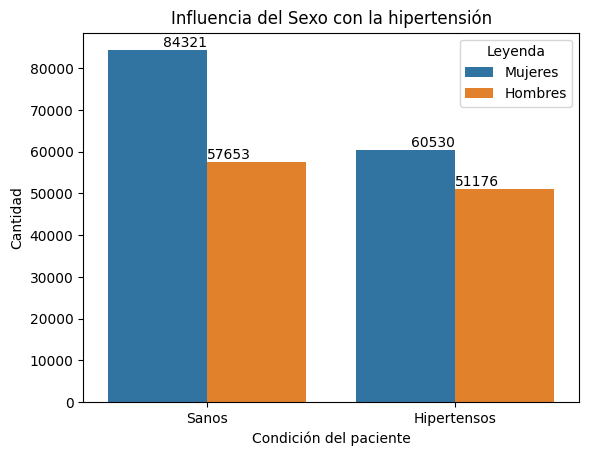

In [12]:
# Cantidad de hombres y mujeres en el DataFrame
sex_counts = DF['Sex'].value_counts()
print('Hombres:', sex_counts[1])
print('Mujeres:', sex_counts[0])
print('-----------------------------------------------')

# Cálculo de la cantidad de personas sanas e hipertensas para hombres y mujeres
sanos_mujeres = len(DF[(DF['Sex'] == 0) & (DF['Hypertension'] == 0)])
hipertensos_mujeres = len(DF[(DF['Sex'] == 0) & (DF['Hypertension'] == 1)])
sanos_hombres = len(DF[(DF['Sex'] == 1) & (DF['Hypertension'] == 0)])
hipertensos_hombres = len(DF[(DF['Sex'] == 1) & (DF['Hypertension'] == 1)])
print('Mujeres sanas:', sanos_mujeres)
print('Mujeres hipertensas:', hipertensos_mujeres)
print('Hombres sanos:', sanos_hombres)
print('Hombres hipertensos:', hipertensos_hombres)

# Visualización del gráfico
sns.countplot(data=DF, x='Sex', hue='Hypertension')
plt.title('Influencia del Sexo con la hipertensión')
plt.xlabel('Condición del paciente')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Sanos', 'Hipertensos'])
plt.legend(title='Leyenda', labels=['Mujeres', 'Hombres'])

# Agregar el texto correspondiente a cada columna
plt.text(0, sanos_mujeres, sanos_mujeres, ha='right', va='bottom')
plt.text(0, hipertensos_mujeres, hipertensos_mujeres, ha='left', va='bottom')
plt.text(1, sanos_hombres, sanos_hombres, ha='right', va='bottom')
plt.text(1, hipertensos_hombres, hipertensos_hombres, ha='left', va='bottom')

plt.show()

#### Influencia del IMC con la hipertensión


Hombres:  111706
Mujeres:  141974


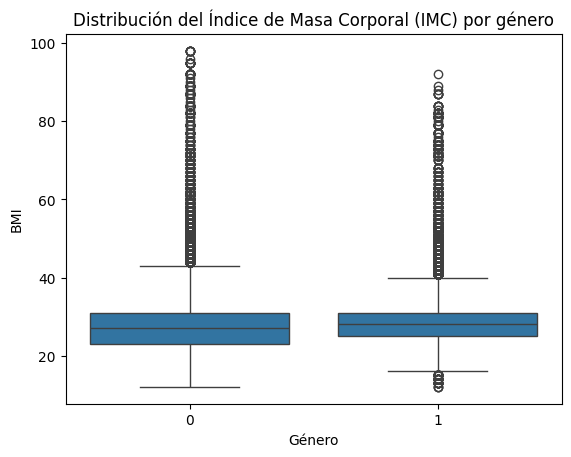

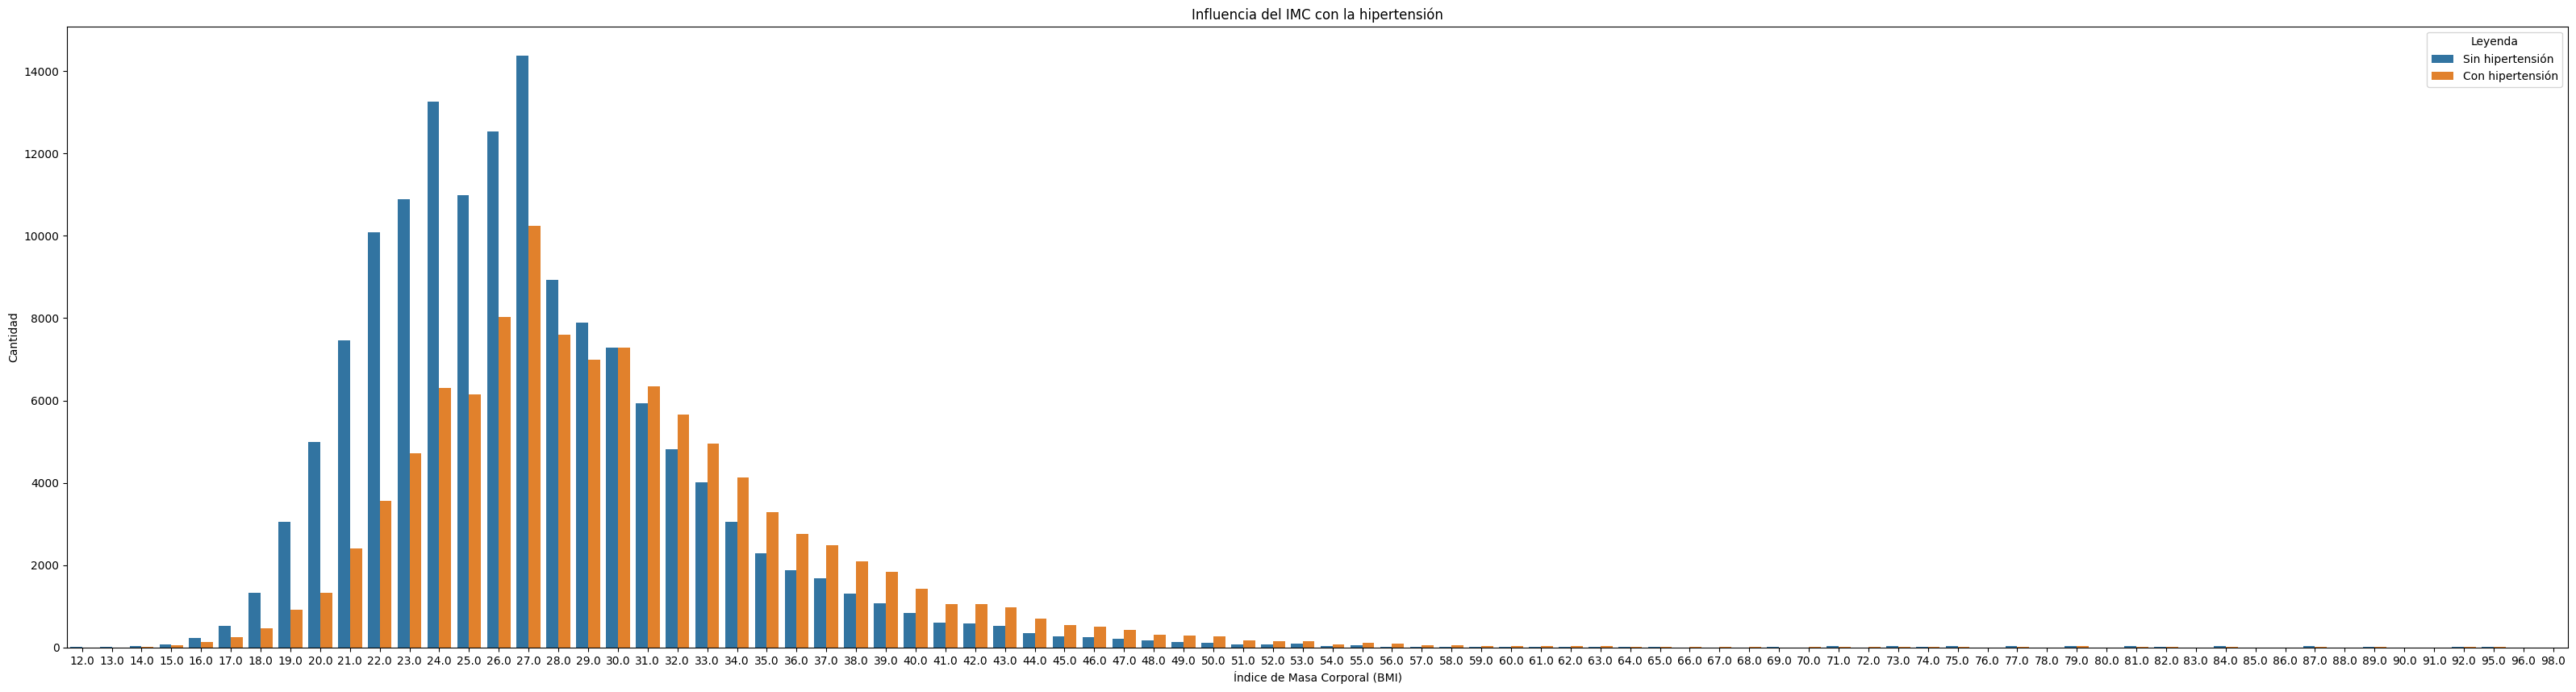

In [13]:
# Contar la cantidad de hombres y mujeres en el DataFrame
# Considerando que DF.Sex es una columna que indica el género
# 1: Hombre, 0: Mujer
# Se utiliza value_counts() para contar los valores únicos y luego se accede a ellos por índice
print('Hombres: ', DF.Sex.value_counts()[1])
print('Mujeres: ', DF.Sex.value_counts()[0])

# Crear un gráfico de caja para visualizar la distribución del índice de masa corporal (BMI) por género
sns.boxplot(x='Sex', y='BMI', data=DF)
plt.title('Distribución del Índice de Masa Corporal (IMC) por género')
plt.xlabel('Género')
plt.ylabel('BMI')
plt.show()

# Crear un gráfico de barras para visualizar la relación entre el IMC y la hipertensión
plt.figure(figsize=(40, 10))  # Establecer el tamaño de la figura
sns.countplot(data=DF, x='BMI', hue='Hypertension')
plt.title('Influencia del IMC con la hipertensión')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Cantidad')
plt.legend(title='Leyenda', labels=['Sin hipertensión', 'Con hipertensión'])


#### Mostrar información general de salud por sexo del paciente


Excelente:  45299
Muy bueno:  89084
Bueno:  75646
Regular:  31570
Deficiente:  12081


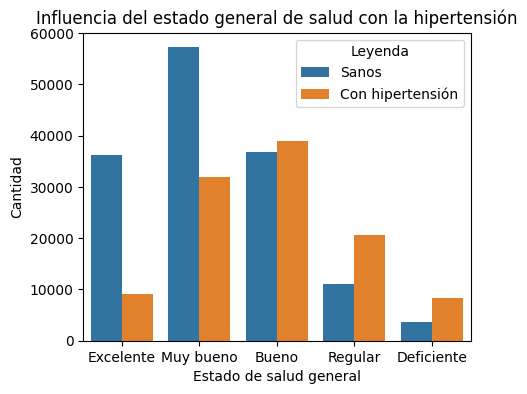

In [14]:
# Imprimir la cantidad de pacientes por estado general de salud
print('Excelente: ', DF.GenHlth.value_counts()[1])
print('Muy bueno: ', DF.GenHlth.value_counts()[2])
print('Bueno: ', DF.GenHlth.value_counts()[3])
print('Regular: ', DF.GenHlth.value_counts()[4])
print('Deficiente: ', DF.GenHlth.value_counts()[5])

# Crear un diccionario para mapear los códigos de estado de salud a sus etiquetas correspondientes
estado_salud_etiquetas = {
    1: 'Excelente',
    2: 'Muy bueno',
    3: 'Bueno',
    4: 'Regular',
    5: 'Deficiente'
}

# Crear un gráfico de barras para visualizar la relación entre el estado general de salud y la hipertensión
plt.figure(figsize=(5, 4))
sns.countplot(data=DF, x='GenHlth', hue='Hypertension')
plt.title('Influencia del estado general de salud con la hipertensión')
plt.xlabel('Estado de salud general')
plt.ylabel('Cantidad')

# Obtener las etiquetas personalizadas para el eje x
etiquetas_x = [estado_salud_etiquetas[i] for i in range(1, 6)]

plt.xticks(ticks=[0, 1, 2, 3, 4], labels=etiquetas_x)
plt.legend(title='Leyenda', labels=['Sanos', 'Con hipertensión'])

plt.show()


#### Consumo de frutas


Comen frutas: 160898
No comen frutas: 92782
-----------------------------------------------
Pacientes sanos que no comen frutas: 50526
Pacientes hipertensos que no comen frutas: 42256
Pacientes sanos que comen frutas: 94325
Pacientes hipertensos que comen frutas: 66573


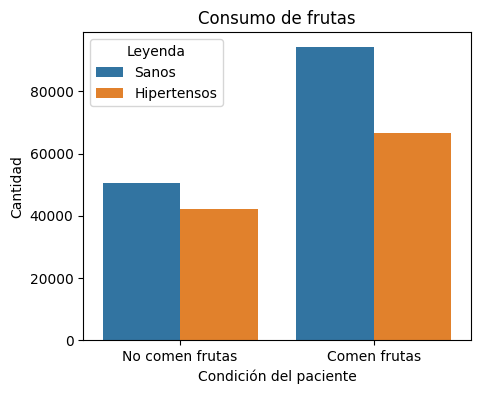

In [15]:
# Calcular la cantidad de hombres y mujeres en el DataFrame
comen_frutas = DF['Fruits'].value_counts()[1]
no_comen_frutas = DF['Fruits'].value_counts()[0]
print('Comen frutas:', comen_frutas)
print('No comen frutas:', no_comen_frutas)
print('-----------------------------------------------')

# Calcular la cantidad de personas sanas e hipertensas que comen y no comen frutas
grupo_frutas_hipertension = DF.groupby(['Fruits', 'Hypertension']).size().unstack(fill_value=0)
nofrutas_sanos = grupo_frutas_hipertension.loc[0, 0]
nofrutas_hipertensos = grupo_frutas_hipertension.loc[0, 1]
frutas_sanos = grupo_frutas_hipertension.loc[1, 0]
frutas_hipertensos = grupo_frutas_hipertension.loc[1, 1]
print('Pacientes sanos que no comen frutas:', nofrutas_sanos)
print('Pacientes hipertensos que no comen frutas:', nofrutas_hipertensos)
print('Pacientes sanos que comen frutas:', frutas_sanos)
print('Pacientes hipertensos que comen frutas:', frutas_hipertensos)

# Visualización del gráfico
plt.figure(figsize=(5, 4))
sns.countplot(data=DF, x='Fruits', hue='Hypertension')
plt.title('Consumo de frutas')
plt.xlabel('Condición del paciente')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No comen frutas', 'Comen frutas'])
plt.legend(title='Leyenda', labels=['Sanos', 'Hipertensos'])

plt.show()

Comen frutas: 160898
No comen frutas: 92782
-----------------------------------------------
Pacientes sanos que no comen frutas: 50526
Pacientes hipertensos que no comen frutas: 42256
Pacientes sanos que comen frutas: 94325
Pacientes hipertensos que comen frutas: 66573


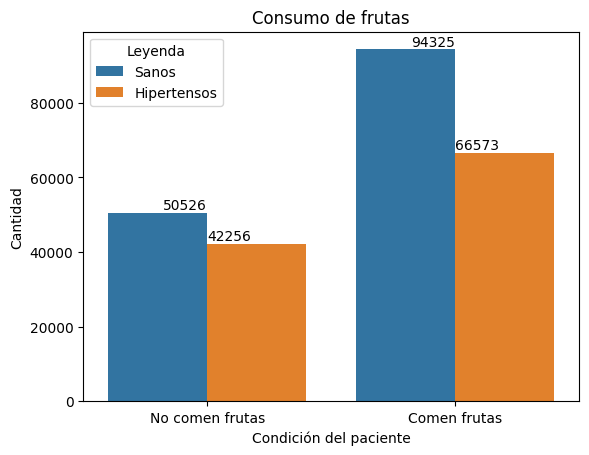

In [16]:
# Cantidad de hombres y mujeres en el DataFrame
comen_frutas = DF['Fruits'].value_counts()[1]
no_comen_frutas = DF['Fruits'].value_counts()[0]
print('Comen frutas:', comen_frutas)
print('No comen frutas:', no_comen_frutas)
print('-----------------------------------------------')

# Cálculo de la cantidad de personas sanas e hipertensas para hombres y mujeres
nofrutas_sanos = len(DF[(DF['Fruits'] == 0) & (DF['Hypertension'] == 0)])
nofrutas_hipertensos = len(DF[(DF['Fruits'] == 0) & (DF['Hypertension'] == 1)])
frutas_sanos = len(DF[(DF['Fruits'] == 1) & (DF['Hypertension'] == 0)])
frutas_hipertensos = len(DF[(DF['Fruits'] == 1) & (DF['Hypertension'] == 1)])
print('Pacientes sanos que no comen frutas:', nofrutas_sanos)
print('Pacientes hipertensos que no comen frutas:', nofrutas_hipertensos)
print('Pacientes sanos que comen frutas:', frutas_sanos)
print('Pacientes hipertensos que comen frutas:', frutas_hipertensos)

# Visualización del gráfico
sns.countplot(data=DF, x='Fruits', hue='Hypertension')
plt.title('Consumo de frutas')
plt.xlabel('Condición del paciente')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No comen frutas', 'Comen frutas'])
plt.legend(title='Leyenda', labels=['Sanos', 'Hipertensos'])

# Agregar el texto correspondiente a cada columna
plt.text(0, nofrutas_sanos, nofrutas_sanos, ha='right', va='bottom')
plt.text(0, nofrutas_hipertensos, nofrutas_hipertensos, ha='left', va='bottom')
plt.text(1, frutas_sanos, frutas_sanos, ha='right', va='bottom')
plt.text(1, frutas_hipertensos, frutas_hipertensos, ha='left', va='bottom')

plt.show()


## Correlación entre las variables

Calcula la matriz de correlación entre todas las variables del DataFrame DF. 
Luego, utiliza esta matriz para crear un mapa de calor que visualiza las correlaciones entre las variables.

### Matriz de correlación

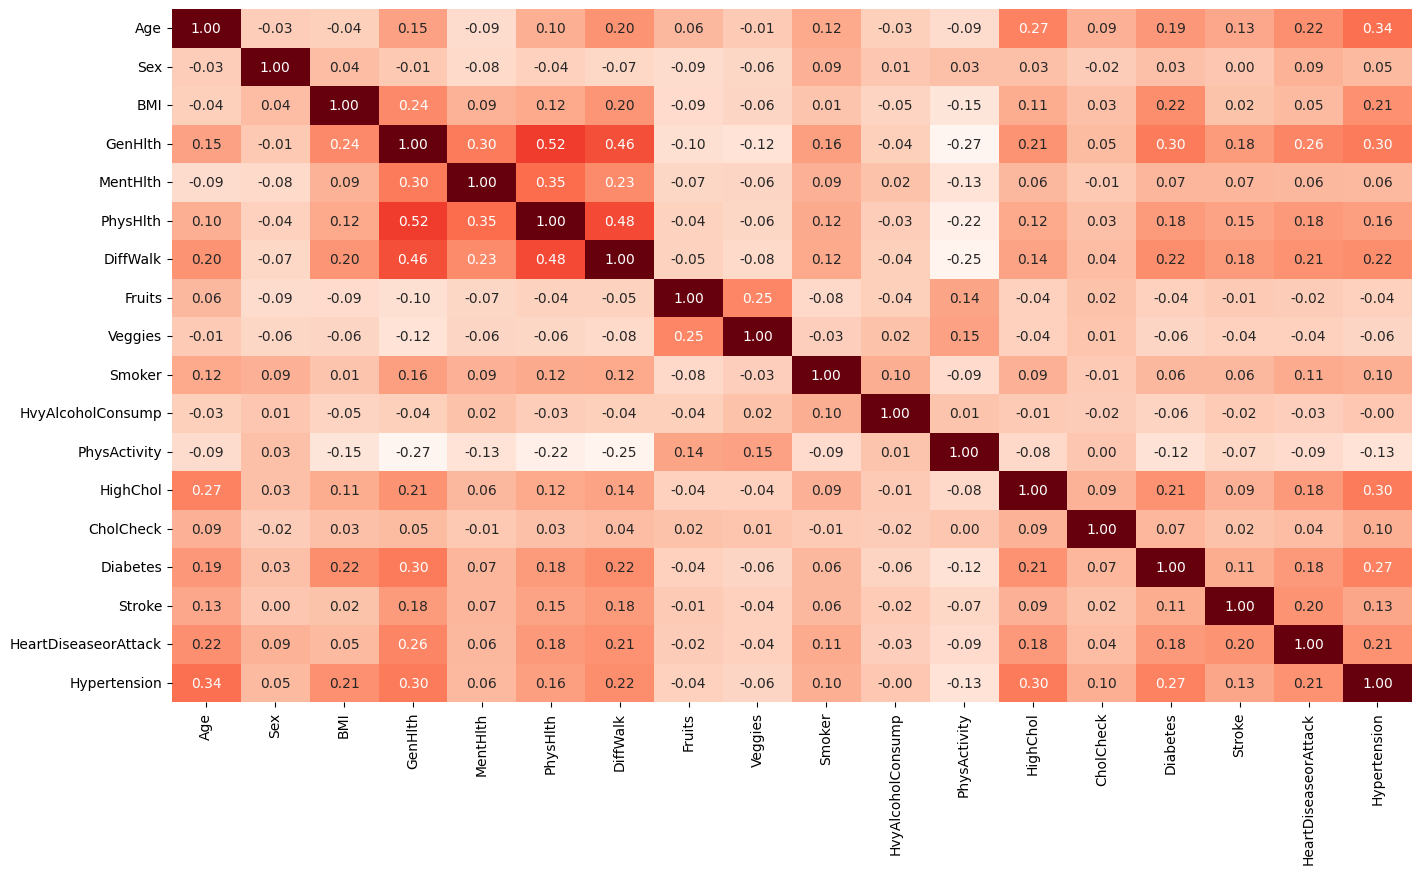

In [17]:
# Calcula la matriz de correlación entre las variables del DataFrame
corr = DF.corr()

# Configura el tamaño de la figura para la visualización del mapa de calor
plt.figure(figsize=(16, 9))

# Crea un mapa de calor de la matriz de correlación
# cmap='Reds' establece el esquema de color del mapa de calor
# cbar=False desactiva la barra de color en el lado del mapa de calor
# annot=True muestra los valores de correlación en las celdas del mapa de calor
# fmt='.2f' establece el formato de los valores de correlación como números de punto flotante con dos decimales
sns.heatmap(corr, cmap='Reds', cbar=False, annot=True, fmt='.2f')

# Muestra el mapa de calor
plt.show()

### Correlación entre variables

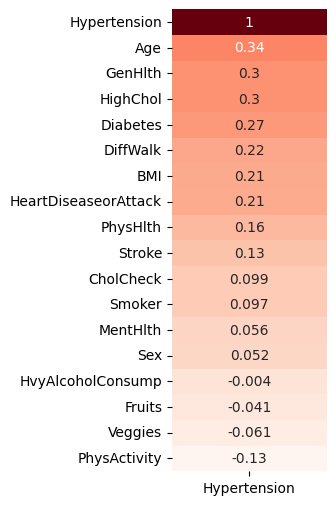

In [18]:
# Calcula la correlación de cada característica con la columna 'Hypertension', luego la ordena de forma descendente y la convierte en un marco de datos
corr = DF.corr()['Hypertension'].sort_values(ascending=False).to_frame()

# Configura el tamaño de la figura para la visualización del mapa de calor
plt.figure(figsize=(2, 6))

# Crea un mapa de calor de la matriz de correlación con la característica 'Hypertension'
# cmap='Reds' establece el esquema de color del mapa de calor
# cbar=False desactiva la barra de color en el lado del mapa de calor
# annot=True muestra los valores de correlación en las celdas del mapa de calor
sns.heatmap(corr, cmap='Reds', cbar=False, annot=True)

# Muestra el mapa de calor
plt.show()

## Balanceo de datos


El SMOTE (Synthetic Minority Over-sampling Technique) se utilizó en este caso para abordar el desequilibrio de clases en el conjunto de datos, donde la clase minoritaria, representada por aquellos que tienen hipertensión, estaba significativamente subrepresentada en comparación con la clase mayoritaria de aquellos que no tienen hipertensión. Los resultados muestran que había 144,851 muestras sin hipertensión y solo 108,829 muestras con hipertensión. Al aplicar SMOTE, se generaron muestras sintéticas de la clase minoritaria para equilibrar la distribución de clases en el conjunto de datos, permitiendo así un análisis y modelado más preciso de la hipertensión y sus factores asociados.

### Visualización de los datos sin SMOTE


In [19]:
# Dividir el conjunto de datos en características (x) y etiquetas (y), eliminando la columna 'Hypertension' de las características
x = DF.drop('Hypertension', axis=1).values
y = DF['Hypertension']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Imprimir la proporción de personas hipertensas en los conjuntos de entrenamiento y prueba
print('Proporción de personas hipertensas en los conjuntos de entrenamiento y prueba\n')
print(f'''% Personas hipertensas en el conjunto de entrenamiento = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Personas hipertensas en el conjunto de prueba = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


Proporción de personas hipertensas en los conjuntos de entrenamiento y prueba

% Personas hipertensas en el conjunto de entrenamiento = 42.82
% Personas hipertensas en el conjunto de prueba = 43.22


### Visualización de datos con SMOTE

In [20]:
# Seleccionar las características (x) excluyendo la columna 'Hypertension', y seleccionar la columna 'Hypertension' como etiquetas (y)
x = DF.drop('Hypertension', axis=1).values
y = DF['Hypertension']

# Aplicar SMOTE para equilibrar las clases
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(x, y)

# Imprimir los cambios en las formas de los datos antes y después de aplicar SMOTE
print(f'''Cambio de X antes de SMOTE: {x.shape}
Cambio de X después de SMOTE: {x_sm.shape}''')

# Imprimir el balance positivo y negativo de las clases (%)
print('\nBalance positivo y negativo de las clases (%):')
print(y_sm.value_counts(normalize=True) * 100)

Cambio de X antes de SMOTE: (253680, 17)
Cambio de X después de SMOTE: (289702, 17)

Balance positivo y negativo de las clases (%):
Hypertension
1    50.0
0    50.0
Name: proportion, dtype: float64


## Machine Learning




**División de Datos: Entrenamiento, Validación y Prueba**

Realicemos la división en entrenamiento (80%), validación (10%) y prueba (10%) utilizando la función train_test_split de la librería Scikit-Learn.

Haremos esta división en dos fases:

* En la primera fase, generamos una partición del 80% para entrenamiento y el 20% restante.
* En la segunda fase, tomamos el 20% restante de los datos y lo dividimos a la mitad para generar los conjuntos de validación y prueba.

In [21]:
%%time
# Inicia la medición del tiempo de ejecución
training_start_time = time.time()

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
# Definir el diccionario para almacenar todos los resultados sin SMOTE
results_without_smote = {}

# Definir el diccionario para almacenar todos los resultados con SMOTE
results_with_smote = {}

### Random Forest

#### Caso hipotético de entrenar con datos desbalanceados

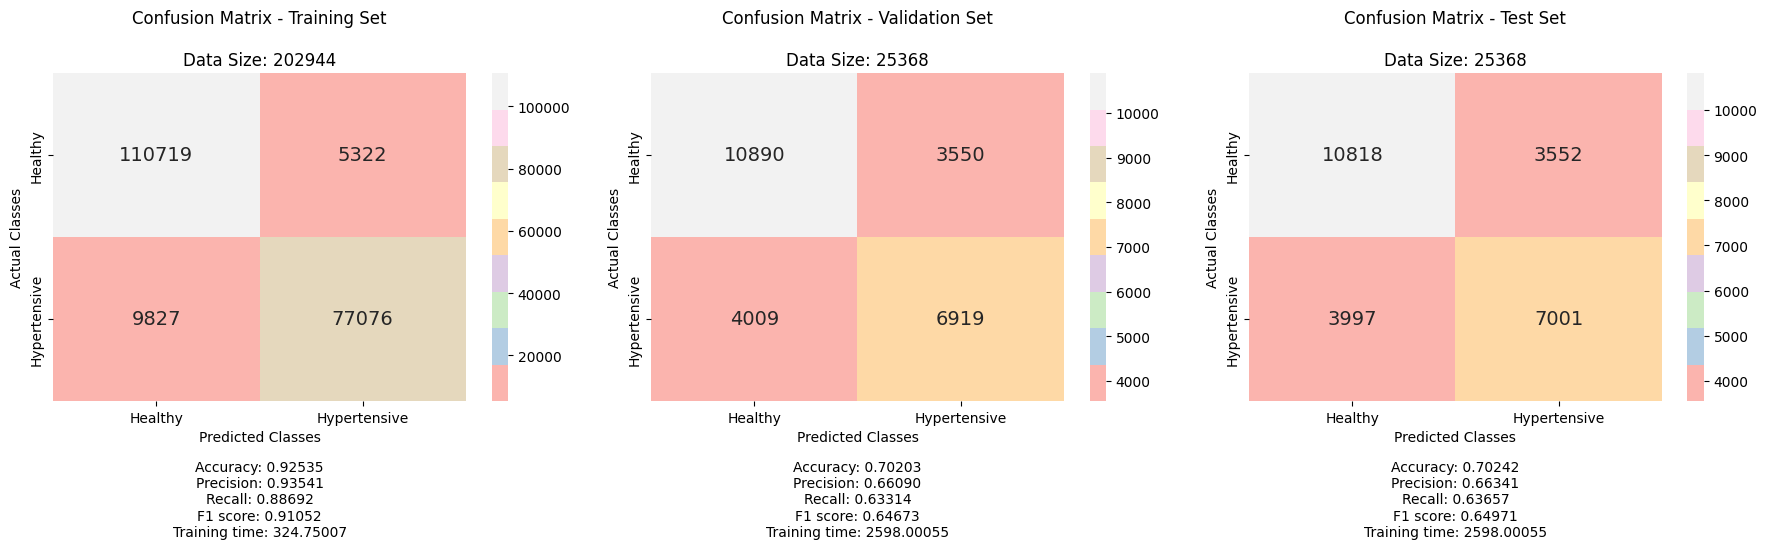

In [23]:
# División de los datos en conjuntos de entrenamiento, validación y prueba
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Función para entrenar y evaluar un modelo RandomForestClassifier.

    Args:
    - x_train (array): Datos de características para entrenamiento.
    - y_train (array): Datos de etiquetas para entrenamiento.
    - x_val (array): Datos de características para validación.
    - y_val (array): Datos de etiquetas para validación.
    - x_test (array): Datos de características para prueba.
    - y_test (array): Datos de etiquetas para prueba.

    Returns:
    - model_rf (RandomForestClassifier): Modelo entrenado RandomForestClassifier.
    - results (dict): Resultados de la evaluación del modelo en conjuntos de entrenamiento, validación y prueba.
    - confusion_matrices (tuple): Matrices de confusión para conjuntos de entrenamiento, validación y prueba.
    """
    start_time = time.time()
    # Inicialización del modelo RandomForestClassifier
    model_rf = RandomForestClassifier(
        random_state=42,  # Semilla aleatoria para reproducibilidad
        criterion='gini',  # Criterio de división de nodos en el árbol de decisión
        max_features='sqrt',  # Número máximo de características a considerar en cada división
    )
    # Entrenamiento del modelo
    model_rf.fit(x_train, y_train)
    end_time = time.time()
    training_time = round((end_time - start_time) * 1e6)

    # Función para evaluar el modelo
    def evaluate(x, y):
        preds = model_rf.predict(x)
        # Cálculo de métricas de evaluación
        accuracy = accuracy_score(y, preds)
        precision = precision_score(y, preds)
        recall = recall_score(y, preds)
        f1 = f1_score(y, preds)
        confusion_mat = confusion_matrix(y, preds)
        return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}, confusion_mat

    # Evaluación del modelo en conjuntos de entrenamiento, validación y prueba
    train_results, confusion_mat_train = evaluate(x_train, y_train)
    val_results, confusion_mat_val = evaluate(x_val, y_val)
    test_results, confusion_mat_test = evaluate(x_test, y_test)

    # Almacenamiento de resultados en un diccionario
    results = {
        'Train': {**train_results, 'Training time': training_time / len(x_train)},
        'Validation': {**val_results, 'Training time': training_time / len(x_val)},
        'Test': {**test_results, 'Training time': training_time / len(x_test)}
    }

    return model_rf, results, (confusion_mat_train, confusion_mat_val, confusion_mat_test)

# Entrenamiento y evaluación del modelo sin SMOTE
model_rf_sinsmote, results_rf_sinsmote, confusion_matrices = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Creación de DataFrame para resultados
results_df = pd.DataFrame(results_rf_sinsmote).T

# Gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, confusion_mat, results) in zip(axes, [('Training Set', confusion_matrices[0], results_rf_sinsmote['Train']),
                                                       ('Validation Set', confusion_matrices[1], results_rf_sinsmote['Validation']),
                                                       ('Test Set', confusion_matrices[2], results_rf_sinsmote['Test'])]):
    sns.heatmap(confusion_mat, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=['Healthy', 'Hypertensive'], yticklabels=['Healthy', 'Hypertensive'], ax=ax)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
    ax.set_title(f'Confusion Matrix - {title}\n\nData Size: {len(x_val) if "Validation" in title else len(x_test) if "Test" in title else len(x_train)}')
    result_text = '\n'.join([f"{metric}: {value:.5f}" for metric, value in results.items()])
    ax.text(0.5, -0.3, result_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()


#### Entrenamiento con datos balanceados (SMOTE)

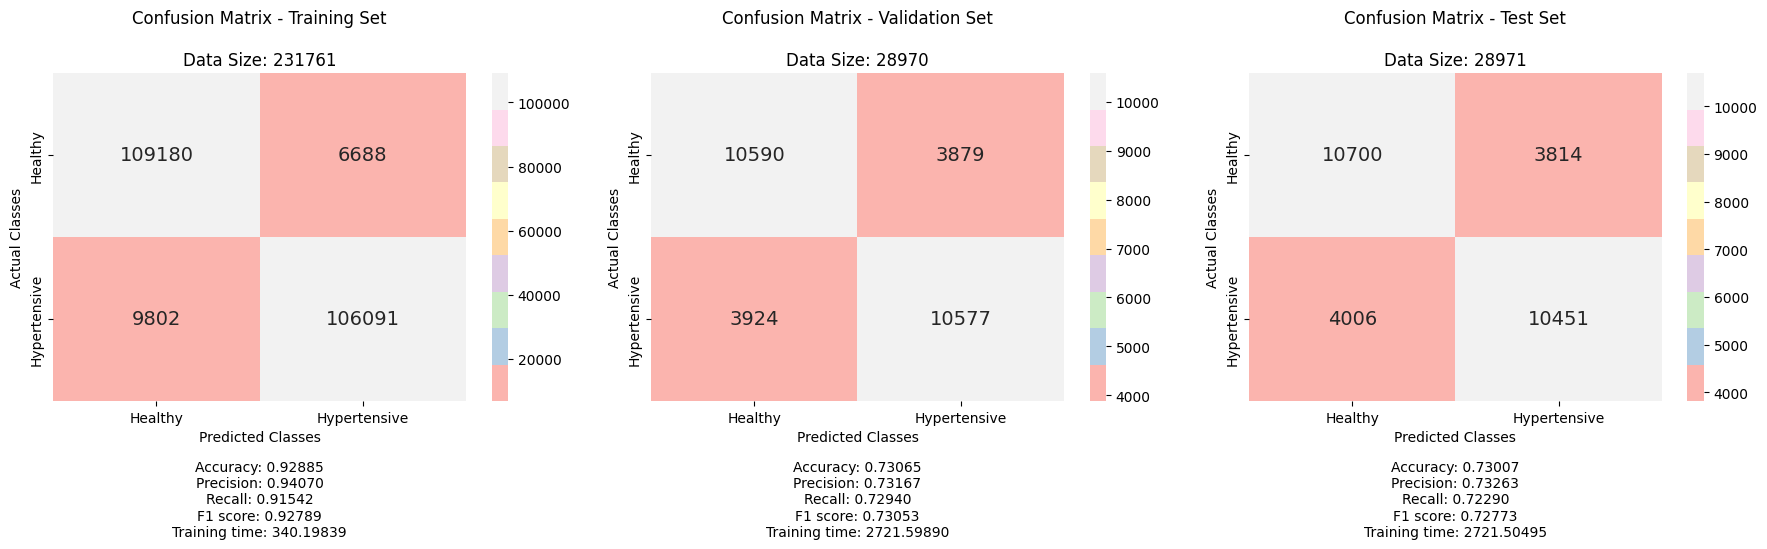

In [24]:
# División de los datos en conjuntos de entrenamiento, validación y prueba
x_train, x_temp, y_train, y_temp = train_test_split(x_sm, y_sm, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Función para entrenar y evaluar un modelo RandomForestClassifier con datos balanceados mediante SMOTE.

    Args:
    - x_train (array): Datos de características para entrenamiento.
    - y_train (array): Datos de etiquetas para entrenamiento.
    - x_val (array): Datos de características para validación.
    - y_val (array): Datos de etiquetas para validación.
    - x_test (array): Datos de características para prueba.
    - y_test (array): Datos de etiquetas para prueba.

    Returns:
    - model_rf (RandomForestClassifier): Modelo entrenado RandomForestClassifier.
    - results (dict): Resultados de la evaluación del modelo en conjuntos de entrenamiento, validación y prueba.
    - confusion_matrices (tuple): Matrices de confusión para conjuntos de entrenamiento, validación y prueba.
    """
    start_time = time.time()
    # Inicialización del modelo RandomForestClassifier
    model_rf = RandomForestClassifier(
        random_state=42,  # Semilla aleatoria para reproducibilidad
        criterion='gini',  # Criterio de división de nodos en el árbol de decisión
        max_features='sqrt'  # Número máximo de características a considerar en cada división
    )
    # Entrenamiento del modelo
    model_rf.fit(x_train, y_train)
    end_time = time.time()
    training_time = round((end_time - start_time) * 1e6)

    # Función para evaluar el modelo
    def evaluate(x, y):
        preds = model_rf.predict(x)
        # Cálculo de métricas de evaluación
        accuracy = accuracy_score(y, preds)
        precision = precision_score(y, preds)
        recall = recall_score(y, preds)
        f1 = f1_score(y, preds)
        confusion_mat = confusion_matrix(y, preds)
        return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}, confusion_mat

    # Evaluación del modelo en conjuntos de entrenamiento, validación y prueba
    train_results, confusion_mat_train = evaluate(x_train, y_train)
    val_results, confusion_mat_val = evaluate(x_val, y_val)
    test_results, confusion_mat_test = evaluate(x_test, y_test)

    # Almacenamiento de resultados en un diccionario
    results = {
        'Train': {**train_results, 'Training time': training_time / len(x_train)},
        'Validation': {**val_results, 'Training time': training_time / len(x_val)},
        'Test': {**test_results, 'Training time': training_time / len(x_test)}
    }

    return model_rf, results, (confusion_mat_train, confusion_mat_val, confusion_mat_test)

# Entrenamiento y evaluación del modelo con SMOTE
model_rf_smote, results_rf_smote, confusion_matrices = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Creación de DataFrame para resultados
results_df = pd.DataFrame(results_rf_smote).T

# Gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, confusion_mat, results) in zip(axes, [('Training Set', confusion_matrices[0], results_rf_smote['Train']),
                                                       ('Validation Set', confusion_matrices[1], results_rf_smote['Validation']),
                                                       ('Test Set', confusion_matrices[2], results_rf_smote['Test'])]):
    sns.heatmap(confusion_mat, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=['Healthy', 'Hypertensive'], yticklabels=['Healthy', 'Hypertensive'], ax=ax)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
    ax.set_title(f'Confusion Matrix - {title}\n\nData Size: {len(x_val) if "Validation" in title else len(x_test) if "Test" in title else len(x_train)}')
    result_text = '\n'.join([f"{metric}: {value:.5f}" for metric, value in results.items()])
    ax.text(0.5, -0.3, result_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

### K-Nearest Neighbors

#### Caso hipotético de entrenar con datos desbalanceados

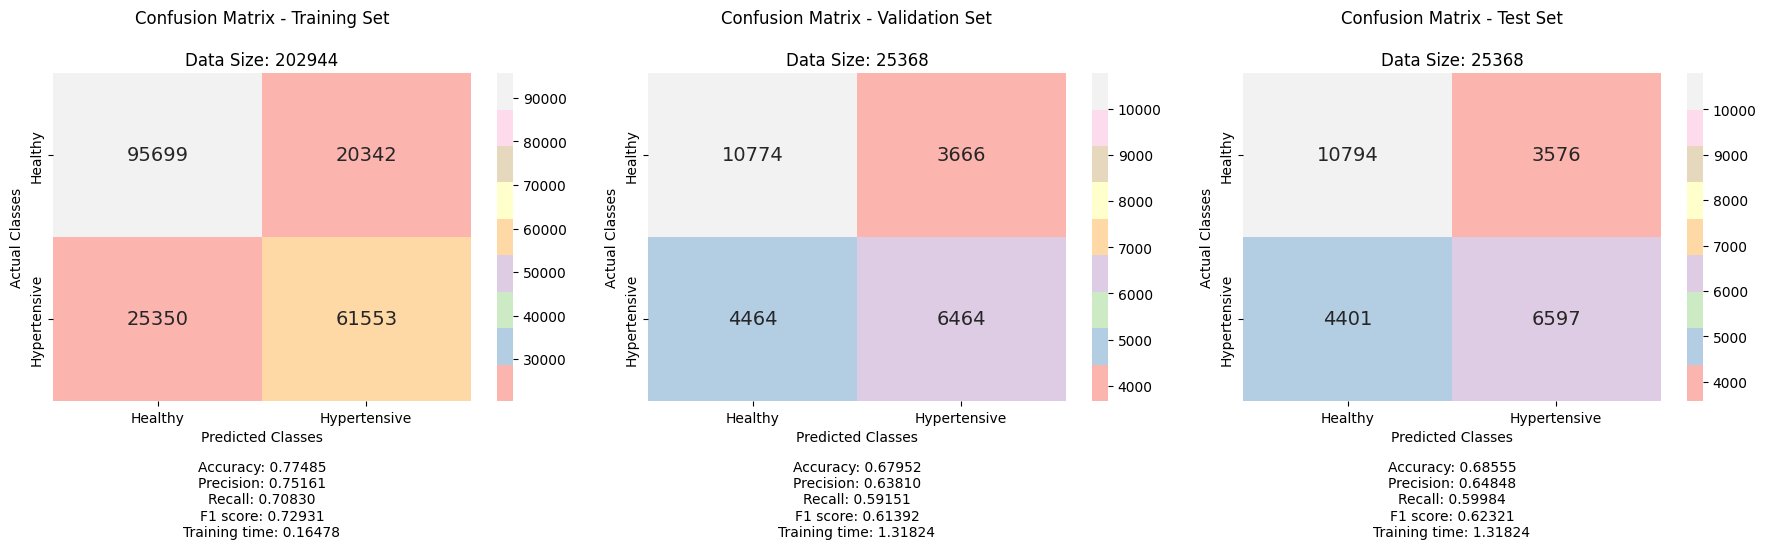

In [25]:
# División de los datos en conjunto de entrenamiento, validación y prueba
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Función para entrenar y evaluar un modelo KNeighborsClassifier sin SMOTE.

    Args:
    - x_train (array): Datos de características para entrenamiento.
    - y_train (array): Datos de etiquetas para entrenamiento.
    - x_val (array): Datos de características para validación.
    - y_val (array): Datos de etiquetas para validación.
    - x_test (array): Datos de características para prueba.
    - y_test (array): Datos de etiquetas para prueba.

    Returns:
    - model_knn (KNeighborsClassifier): Modelo entrenado KNeighborsClassifier.
    - results (dict): Resultados de la evaluación del modelo en conjuntos de entrenamiento, validación y prueba.
    - confusion_matrices (tuple): Matrices de confusión para conjuntos de entrenamiento, validación y prueba.
    """
    start_time = time.time()
    # Inicialización del modelo KNeighborsClassifier
    model_knn = KNeighborsClassifier(
        leaf_size=20,  # Tamaño de la hoja del árbol
        weights='uniform',  # Ponderación de vecinos (uniforme)
        n_neighbors=5,  # Número de vecinos
        p=2  # Parámetro para la métrica de distancia (2 para distancia Euclidiana)
    )
    # Entrenamiento del modelo
    model_knn.fit(x_train, y_train)
    end_time = time.time()
    training_time = round((end_time - start_time) * 1e6)

    # Función para evaluar el modelo
    def evaluate(x, y):
        preds = model_knn.predict(x)
        # Cálculo de métricas de evaluación
        accuracy = accuracy_score(y, preds)
        precision = precision_score(y, preds)
        recall = recall_score(y, preds)
        f1 = f1_score(y, preds)
        confusion_mat = confusion_matrix(y, preds)
        return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}, confusion_mat

    # Evaluación del modelo en conjuntos de entrenamiento, validación y prueba
    train_results, confusion_mat_train = evaluate(x_train, y_train)
    val_results, confusion_mat_val = evaluate(x_val, y_val)
    test_results, confusion_mat_test = evaluate(x_test, y_test)

    # Almacenamiento de resultados en un diccionario
    results = {
        'Train': {**train_results, 'Training time': training_time / len(x_train)},
        'Validation': {**val_results, 'Training time': training_time / len(x_val)},
        'Test': {**test_results, 'Training time': training_time / len(x_test)}
    }

    return model_knn, results, (confusion_mat_train, confusion_mat_val, confusion_mat_test)

# Entrenamiento y evaluación del modelo sin SMOTE
model_knn_sinsmote, results_knn_sinsmote, confusion_matrices = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Creación de DataFrame para resultados
results_df = pd.DataFrame(results_without_smote).T

# Gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, confusion_mat, results) in zip(axes, [('Training Set', confusion_matrices[0], results_knn_sinsmote['Train']),
                                                       ('Validation Set', confusion_matrices[1], results_knn_sinsmote['Validation']),
                                                       ('Test Set', confusion_matrices[2], results_knn_sinsmote['Test'])]):
    sns.heatmap(confusion_mat, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=['Healthy', 'Hypertensive'], yticklabels=['Healthy', 'Hypertensive'], ax=ax)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
    ax.set_title(f'Confusion Matrix - {title}\n\nData Size: {len(x_val) if "Validation" in title else len(x_test) if "Test" in title else len(x_train)}')
    result_text = '\n'.join([f"{metric}: {value:.5f}" for metric, value in results.items()])
    ax.text(0.5, -0.3, result_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

#### Entrenamiento con datos balanceados (SMOTE)

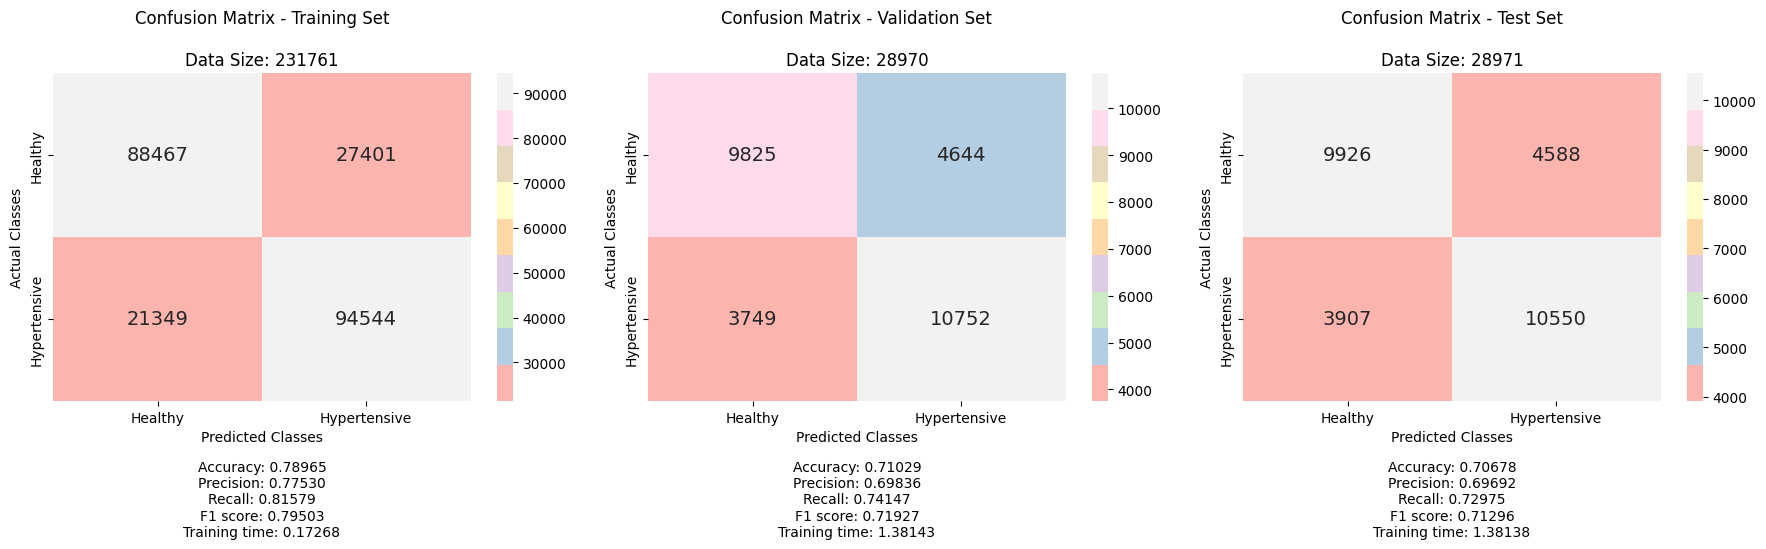

In [26]:
# División de los datos en conjunto de entrenamiento, validación y prueba
x_train, x_temp, y_train, y_temp = train_test_split(x_sm, y_sm, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Función para entrenar y evaluar un modelo KNeighborsClassifier con SMOTE.

    Args:
    - x_train (array): Datos de características para entrenamiento.
    - y_train (array): Datos de etiquetas para entrenamiento.
    - x_val (array): Datos de características para validación.
    - y_val (array): Datos de etiquetas para validación.
    - x_test (array): Datos de características para prueba.
    - y_test (array): Datos de etiquetas para prueba.

    Returns:
    - model_knn (KNeighborsClassifier): Modelo entrenado KNeighborsClassifier.
    - results (dict): Resultados de la evaluación del modelo en conjuntos de entrenamiento, validación y prueba.
    - confusion_matrices (tuple): Matrices de confusión para conjuntos de entrenamiento, validación y prueba.
    """
    start_time = time.time()
    # Inicialización del modelo KNeighborsClassifier
    model_knn = KNeighborsClassifier(
        leaf_size=20,  # Tamaño de la hoja del árbol
        weights='uniform',  # Ponderación de vecinos (uniforme)
        n_neighbors=5,  # Número de vecinos
        p=2  # Parámetro para la métrica de distancia (2 para distancia Euclidiana)
    )
    # Entrenamiento del modelo
    model_knn.fit(x_train, y_train)
    end_time = time.time()
    training_time = round((end_time - start_time) * 1e6)

    # Función para evaluar el modelo
    def evaluate(x, y):
        preds = model_knn.predict(x)
        # Cálculo de métricas de evaluación
        accuracy = accuracy_score(y, preds)
        precision = precision_score(y, preds)
        recall = recall_score(y, preds)
        f1 = f1_score(y, preds)
        confusion_mat = confusion_matrix(y, preds)
        return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}, confusion_mat

    # Evaluación del modelo en conjuntos de entrenamiento, validación y prueba
    train_results, confusion_mat_train = evaluate(x_train, y_train)
    val_results, confusion_mat_val = evaluate(x_val, y_val)
    test_results, confusion_mat_test = evaluate(x_test, y_test)

    # Almacenamiento de resultados en un diccionario
    results = {
        'Train': {**train_results, 'Training time': training_time / len(x_train)},
        'Validation': {**val_results, 'Training time': training_time / len(x_val)},
        'Test': {**test_results, 'Training time': training_time / len(x_test)}
    }

    return model_knn, results, (confusion_mat_train, confusion_mat_val, confusion_mat_test)

# Entrenamiento y evaluación del modelo con SMOTE
model_knn_smote, results_knn_smote, confusion_matrices = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Creación de DataFrame para resultados
results_df = pd.DataFrame(results_with_smote).T

# Gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, confusion_mat, results) in zip(axes, [('Training Set', confusion_matrices[0], results_knn_smote['Train']),
                                                       ('Validation Set', confusion_matrices[1], results_knn_smote['Validation']),
                                                       ('Test Set', confusion_matrices[2], results_knn_smote['Test'])]):
    sns.heatmap(confusion_mat, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=['Healthy', 'Hypertensive'], yticklabels=['Healthy', 'Hypertensive'], ax=ax)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
    ax.set_title(f'Confusion Matrix - {title}\n\nData Size: {len(x_val) if "Validation" in title else len(x_test) if "Test" in title else len(x_train)}')
    result_text = '\n'.join([f"{metric}: {value:.5f}" for metric, value in results.items()])
    ax.text(0.5, -0.3, result_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

### Decision Tree

#### Caso hipotético de entrenar con datos desbalanceados

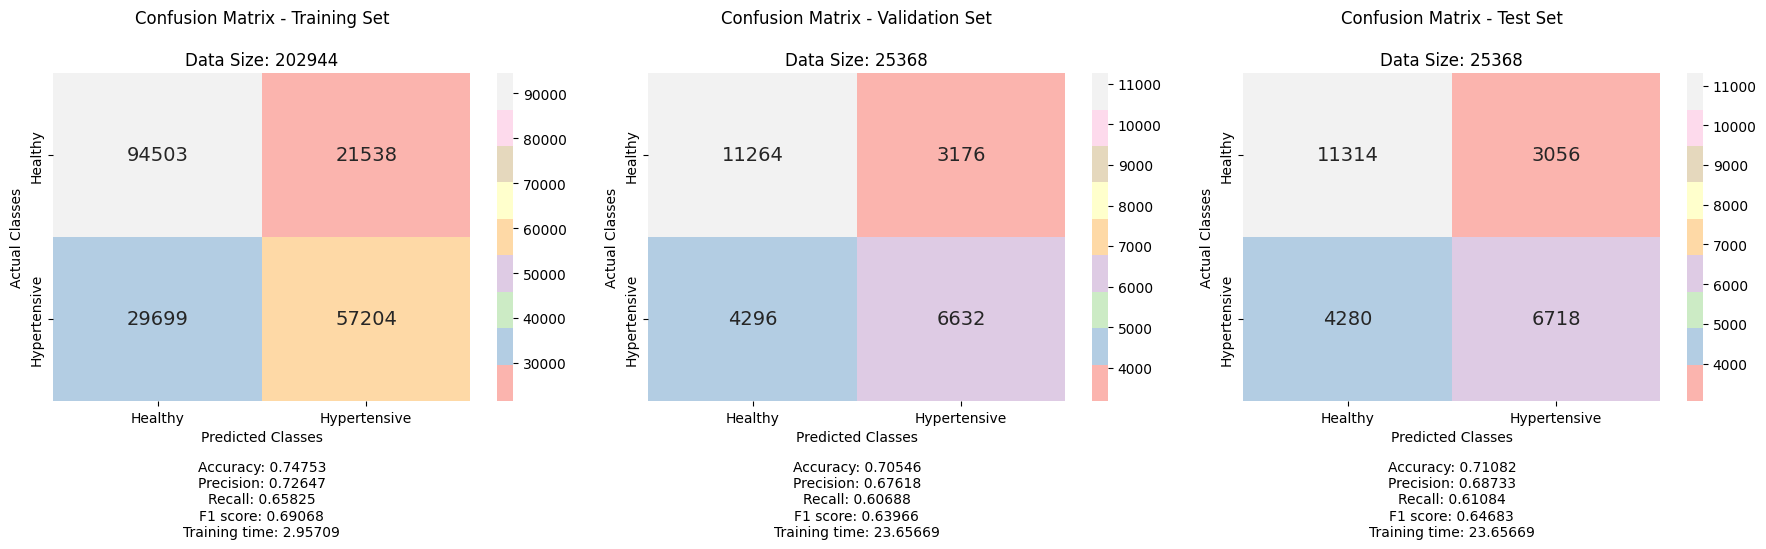

In [27]:
# División de los datos en conjunto de entrenamiento (80%), conjunto de validación (10%) y conjunto de pruebas (10%)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Función para entrenar y evaluar un modelo DecisionTreeClassifier.

    Args:
    - x_train (array): Datos de características para entrenamiento.
    - y_train (array): Datos de etiquetas para entrenamiento.
    - x_val (array): Datos de características para validación.
    - y_val (array): Datos de etiquetas para validación.
    - x_test (array): Datos de características para prueba.
    - y_test (array): Datos de etiquetas para prueba.

    Returns:
    - model_tree (DecisionTreeClassifier): Modelo entrenado DecisionTreeClassifier.
    - results (dict): Resultados de la evaluación del modelo en conjuntos de entrenamiento, validación y prueba.
    - confusion_matrices (tuple): Matrices de confusión para conjuntos de entrenamiento, validación y prueba.
    """
    start_time = time.time()
    # Inicialización del modelo DecisionTreeClassifier
    model_tree = DecisionTreeClassifier(
        criterion='gini',  # Criterio de división de nodos
        max_features='sqrt',  # Número máximo de características a considerar en cada división
        max_leaf_nodes=None,  # Máximo número de nodos hoja
        min_samples_leaf=10  # Mínimo número de muestras en un nodo hoja
    )
    # Entrenamiento del modelo
    model_tree.fit(x_train, y_train)
    end_time = time.time()
    training_time = round((end_time - start_time) * 1e6)

    # Función para evaluar el modelo
    def evaluate(x, y):
        preds = model_tree.predict(x)
        # Cálculo de métricas de evaluación
        accuracy = accuracy_score(y, preds)
        precision = precision_score(y, preds)
        recall = recall_score(y, preds)
        f1 = f1_score(y, preds)
        confusion_mat = confusion_matrix(y, preds)
        return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}, confusion_mat

    # Evaluación del modelo en conjuntos de entrenamiento, validación y prueba
    train_results, confusion_mat_train = evaluate(x_train, y_train)
    val_results, confusion_mat_val = evaluate(x_val, y_val)
    test_results, confusion_mat_test = evaluate(x_test, y_test)

    # Almacenamiento de resultados en un diccionario
    results = {
        'Train': {**train_results, 'Training time': training_time / len(x_train)},
        'Validation': {**val_results, 'Training time': training_time / len(x_val)},
        'Test': {**test_results, 'Training time': training_time / len(x_test)}
    }

    return model_tree, results, (confusion_mat_train, confusion_mat_val, confusion_mat_test)

# Entrenamiento y evaluación del modelo sin SMOTE
model_dt_sinsmote, results_dt_sinsmote, confusion_matrices = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Creación de DataFrame para resultados
results_df = pd.DataFrame(results_without_smote).T

# Gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, confusion_mat, results) in zip(axes, [('Training Set', confusion_matrices[0], results_dt_sinsmote['Train']),
                                                       ('Validation Set', confusion_matrices[1], results_dt_sinsmote['Validation']),
                                                       ('Test Set', confusion_matrices[2], results_dt_sinsmote['Test'])]):
    sns.heatmap(confusion_mat, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=['Healthy', 'Hypertensive'], yticklabels=['Healthy', 'Hypertensive'], ax=ax)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
    ax.set_title(f'Confusion Matrix - {title}\n\nData Size: {len(x_val) if "Validation" in title else len(x_test) if "Test" in title else len(x_train)}')
    result_text = '\n'.join([f"{metric}: {value:.5f}" for metric, value in results.items()])
    ax.text(0.5, -0.3, result_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

#### Entrenamiento con datos balanceados (SMOTE)

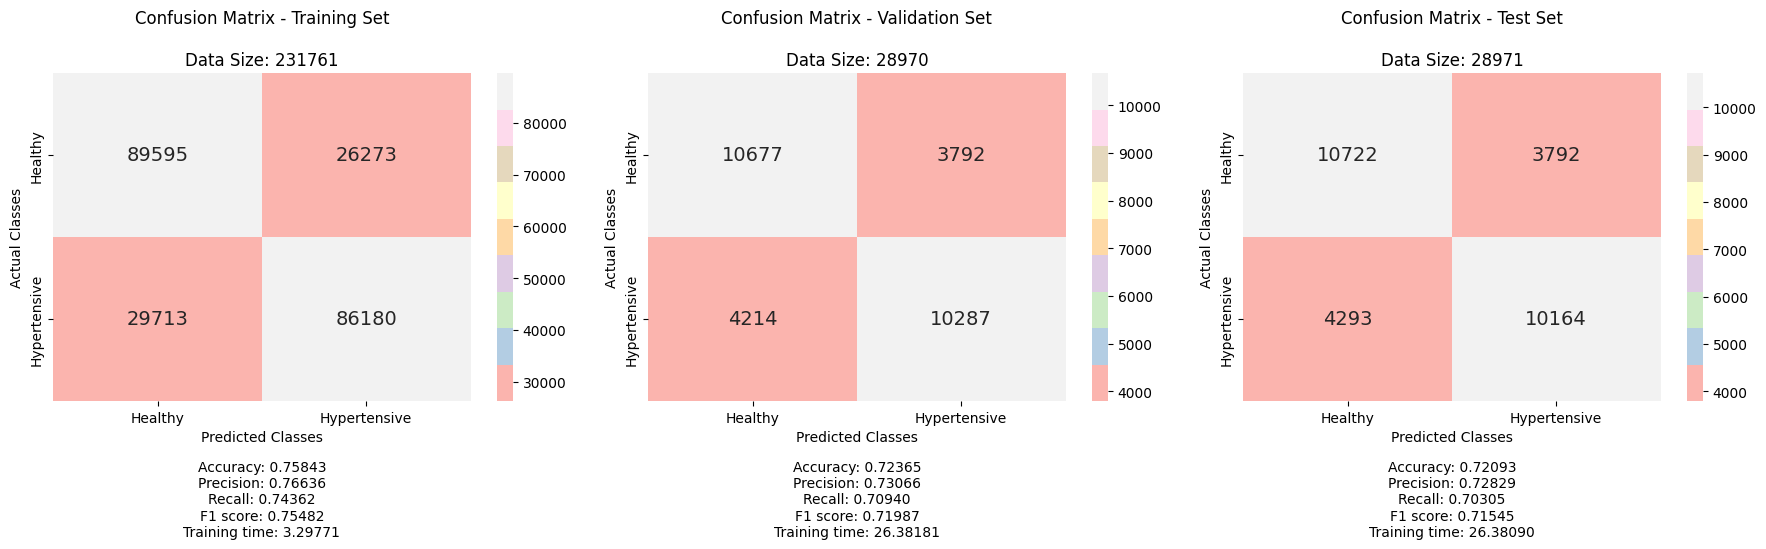

In [28]:
# División de los datos en conjunto de entrenamiento (80%), conjunto de validación (10%) y conjunto de pruebas (10%)
x_train, x_temp, y_train, y_temp = train_test_split(x_sm, y_sm, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Función para entrenar y evaluar un modelo DecisionTreeClassifier con datos balanceados.

    Args:
    - x_train (array): Datos de características para entrenamiento.
    - y_train (array): Datos de etiquetas para entrenamiento.
    - x_val (array): Datos de características para validación.
    - y_val (array): Datos de etiquetas para validación.
    - x_test (array): Datos de características para prueba.
    - y_test (array): Datos de etiquetas para prueba.

    Returns:
    - model_tree (DecisionTreeClassifier): Modelo entrenado DecisionTreeClassifier.
    - results (dict): Resultados de la evaluación del modelo en conjuntos de entrenamiento, validación y prueba.
    - confusion_matrices (tuple): Matrices de confusión para conjuntos de entrenamiento, validación y prueba.
    """
    start_time = time.time()
    # Inicialización del modelo DecisionTreeClassifier
    model_tree = DecisionTreeClassifier(
        criterion='gini',  # Criterio de división de nodos
        max_features='sqrt',  # Número máximo de características a considerar en cada división
        max_leaf_nodes=None,  # Máximo número de nodos hoja
        min_samples_leaf=10  # Mínimo número de muestras en un nodo hoja
    )
    # Entrenamiento del modelo
    model_tree.fit(x_train, y_train)
    end_time = time.time()
    training_time = round((end_time - start_time) * 1e6)

    # Función para evaluar el modelo
    def evaluate(x, y):
        preds = model_tree.predict(x)
        # Cálculo de métricas de evaluación
        accuracy = accuracy_score(y, preds)
        precision = precision_score(y, preds)
        recall = recall_score(y, preds)
        f1 = f1_score(y, preds)
        confusion_mat = confusion_matrix(y, preds)
        return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}, confusion_mat

    # Evaluación del modelo en conjuntos de entrenamiento, validación y prueba
    train_results, confusion_mat_train = evaluate(x_train, y_train)
    val_results, confusion_mat_val = evaluate(x_val, y_val)
    test_results, confusion_mat_test = evaluate(x_test, y_test)

    # Almacenamiento de resultados en un diccionario
    results = {
        'Train': {**train_results, 'Training time': training_time / len(x_train)},
        'Validation': {**val_results, 'Training time': training_time / len(x_val)},
        'Test': {**test_results, 'Training time': training_time / len(x_test)}
    }

    return model_tree, results, (confusion_mat_train, confusion_mat_val, confusion_mat_test)

# Entrenamiento y evaluación del modelo sin SMOTE
model_dt_smote, results_dt_smote, confusion_matrices = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Creación de DataFrame para resultados
results_df = pd.DataFrame(results_with_smote).T

# Gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, confusion_mat, results) in zip(axes, [('Training Set', confusion_matrices[0], results_dt_smote['Train']),
                                                       ('Validation Set', confusion_matrices[1], results_dt_smote['Validation']),
                                                       ('Test Set', confusion_matrices[2], results_dt_smote['Test'])]):
    sns.heatmap(confusion_mat, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=['Healthy', 'Hypertensive'], yticklabels=['Healthy', 'Hypertensive'], ax=ax)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
    ax.set_title(f'Confusion Matrix - {title}\n\nData Size: {len(x_val) if "Validation" in title else len(x_test) if "Test" in title else len(x_train)}')
    result_text = '\n'.join([f"{metric}: {value:.5f}" for metric, value in results.items()])
    ax.text(0.5, -0.3, result_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

### Logistic Regression

#### Caso hipotético de entrenar con datos desbalanceados

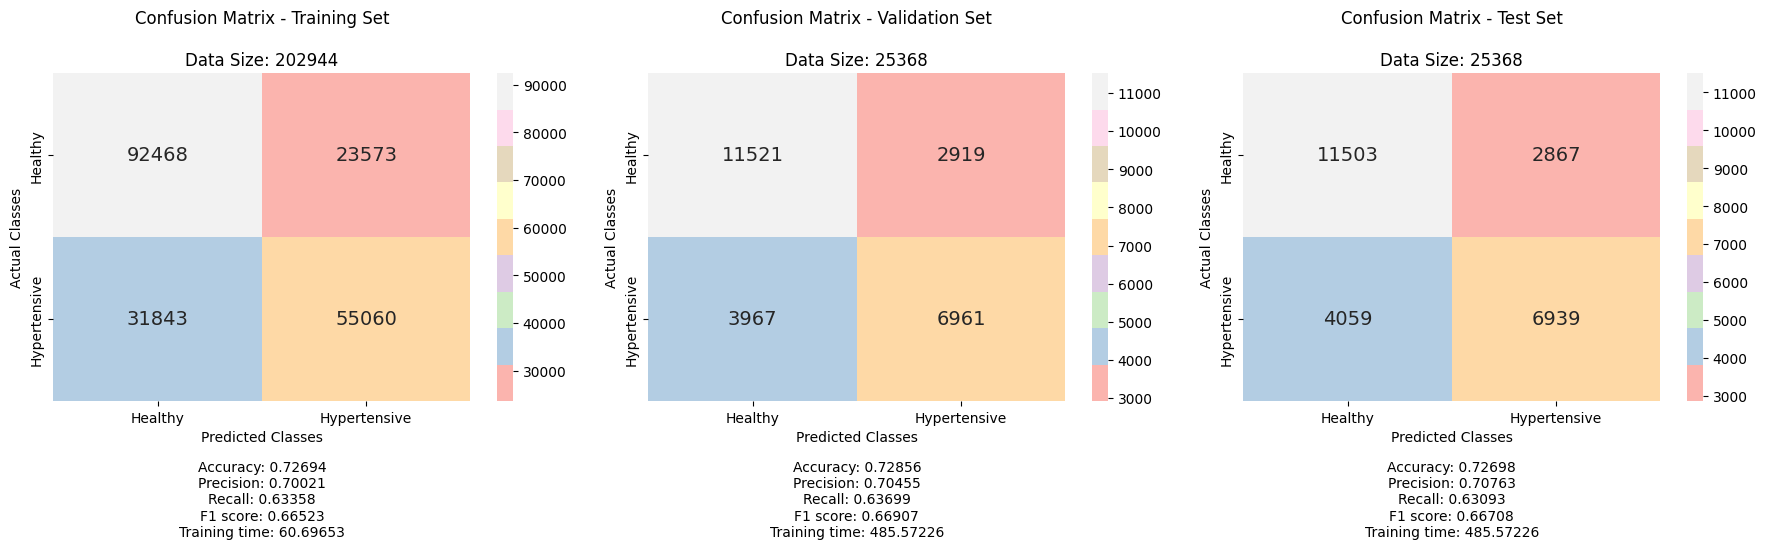

In [29]:
# División de los datos en conjunto de entrenamiento (80%), conjunto de validación (10%) y conjunto de pruebas (10%)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Entrena y evalúa un modelo de regresión logística.

    Args:
    - x_train (array): Características de entrenamiento.
    - y_train (array): Etiquetas de entrenamiento.
    - x_val (array): Características de validación.
    - y_val (array): Etiquetas de validación.
    - x_test (array): Características de prueba.
    - y_test (array): Etiquetas de prueba.

    Returns:
    - model_logistic (LogisticRegression): Modelo entrenado de regresión logística.
    - results (dict): Resultados de la evaluación en conjuntos de entrenamiento, validación y prueba.
    - confusion_matrices (tuple): Matrices de confusión para conjuntos de entrenamiento, validación y prueba.
    """
    start_time = time.time()
    # Inicialización del modelo de regresión logística
    model_logistic = LogisticRegression(
        random_state=42,  # Semilla aleatoria para reproducibilidad
        penalty='l1',  # Tipo de regularización (Lasso)
        C=1,  # Inversa de la fuerza de regularización
        solver='liblinear'  # Algoritmo de optimización para resolver el problema de optimización
    )
    # Entrenamiento del modelo
    model_logistic.fit(x_train, y_train)
    end_time = time.time()
    training_time = round((end_time - start_time) * 1e6)

    # Función para evaluar el modelo
    def evaluate(x, y):
        preds = model_logistic.predict(x)
        # Cálculo de métricas de evaluación
        accuracy = accuracy_score(y, preds)
        precision = precision_score(y, preds)
        recall = recall_score(y, preds)
        f1 = f1_score(y, preds)
        confusion_mat = confusion_matrix(y, preds)
        return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}, confusion_mat

    # Evaluación del modelo en conjuntos de entrenamiento, validación y prueba
    train_results, confusion_mat_train = evaluate(x_train, y_train)
    val_results, confusion_mat_val = evaluate(x_val, y_val)
    test_results, confusion_mat_test = evaluate(x_test, y_test)

    # Almacenamiento de resultados en un diccionario
    results = {
        'Train': {**train_results, 'Training time': training_time / len(x_train)},
        'Validation': {**val_results, 'Training time': training_time / len(x_val)},
        'Test': {**test_results, 'Training time': training_time / len(x_test)}
    }

    return model_logistic, results, (confusion_mat_train, confusion_mat_val, confusion_mat_test)

# Entrena y evalúa el modelo de regresión logística sin SMOTE
model_lr_sinsmote, results_lr_sinsmote, confusion_matrices_logistic = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Crea DataFrame para los resultados
results_df_logistic = pd.DataFrame(results_without_smote).T

# Gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, confusion_mat, results) in zip(axes, [('Training Set', confusion_matrices_logistic[0], results_lr_sinsmote['Train']),
                                                       ('Validation Set', confusion_matrices_logistic[1], results_lr_sinsmote['Validation']),
                                                       ('Test Set', confusion_matrices_logistic[2], results_lr_sinsmote['Test'])]):
    sns.heatmap(confusion_mat, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=['Healthy', 'Hypertensive'], yticklabels=['Healthy', 'Hypertensive'], ax=ax)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
    ax.set_title(f'Confusion Matrix - {title}\n\nData Size: {len(x_val) if "Validation" in title else len(x_test) if "Test" in title else len(x_train)}')
    result_text = '\n'.join([f"{metric}: {value:.5f}" for metric, value in results.items()])
    ax.text(0.5, -0.3, result_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

#### Entrenamiento con datos balanceados (SMOTE)

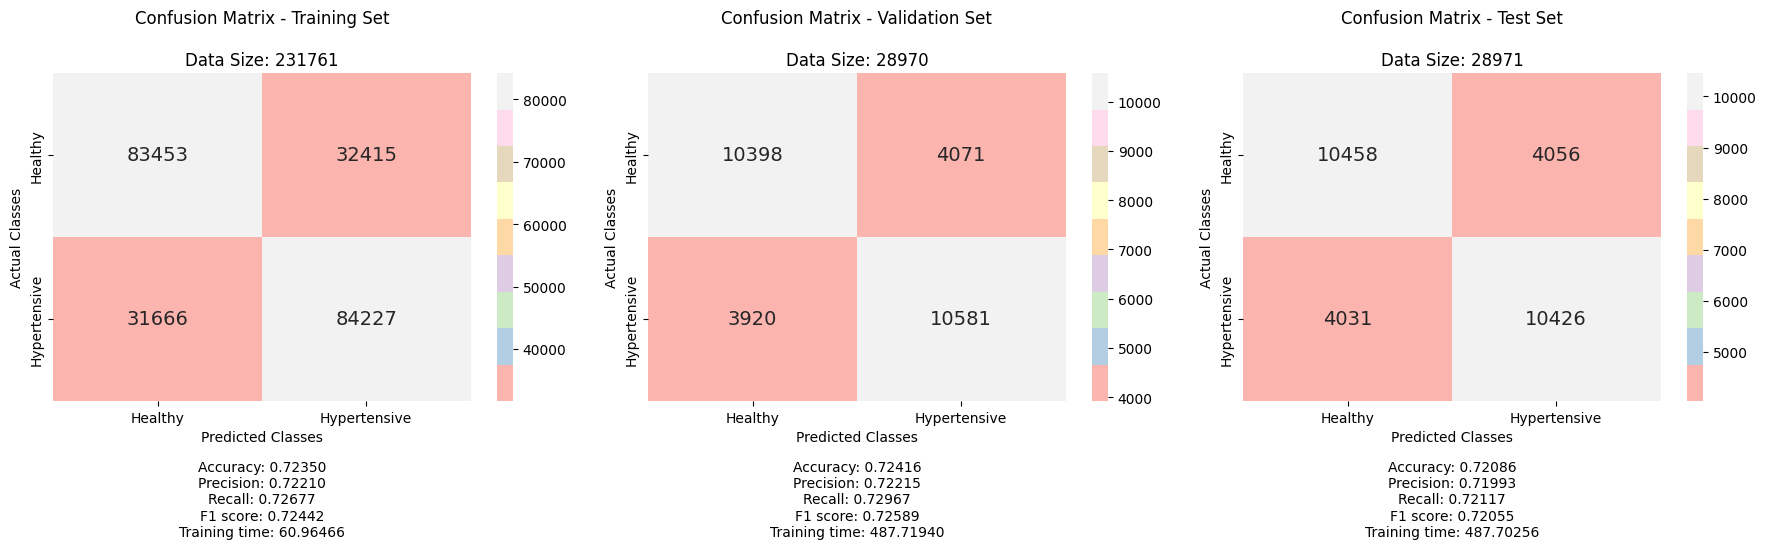

In [30]:
# División de los datos en conjunto de entrenamiento (80%), conjunto de validación (10%) y conjunto de pruebas (10%)
x_train, x_temp, y_train, y_temp = train_test_split(x_sm, y_sm, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Entrena y evalúa un modelo de regresión logística con datos balanceados.

    Args:
    - x_train (array): Características de entrenamiento.
    - y_train (array): Etiquetas de entrenamiento.
    - x_val (array): Características de validación.
    - y_val (array): Etiquetas de validación.
    - x_test (array): Características de prueba.
    - y_test (array): Etiquetas de prueba.

    Returns:
    - model_logistic (LogisticRegression): Modelo entrenado de regresión logística.
    - results (dict): Resultados de la evaluación en conjuntos de entrenamiento, validación y prueba.
    - confusion_matrices (tuple): Matrices de confusión para conjuntos de entrenamiento, validación y prueba.
    """
    start_time = time.time()
    # Inicialización del modelo de regresión logística
    model_logistic = LogisticRegression(
        random_state=42,  # Semilla aleatoria para reproducibilidad
        penalty='l1',  # Tipo de regularización (Lasso)
        C=1,  # Inversa de la fuerza de regularización
        solver='liblinear'  # Algoritmo de optimización para resolver el problema de optimización
    )
    # Entrenamiento del modelo
    model_logistic.fit(x_train, y_train)
    end_time = time.time()
    training_time = round((end_time - start_time) * 1e6)

    # Función para evaluar el modelo
    def evaluate(x, y):
        preds = model_logistic.predict(x)
        # Cálculo de métricas de evaluación
        accuracy = accuracy_score(y, preds)
        precision = precision_score(y, preds)
        recall = recall_score(y, preds)
        f1 = f1_score(y, preds)
        confusion_mat = confusion_matrix(y, preds)
        return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}, confusion_mat

    # Evaluación del modelo en conjuntos de entrenamiento, validación y prueba
    train_results, confusion_mat_train = evaluate(x_train, y_train)
    val_results, confusion_mat_val = evaluate(x_val, y_val)
    test_results, confusion_mat_test = evaluate(x_test, y_test)

    # Almacenamiento de resultados en un diccionario
    results = {
        'Train': {**train_results, 'Training time': training_time / len(x_train)},
        'Validation': {**val_results, 'Training time': training_time / len(x_val)},
        'Test': {**test_results, 'Training time': training_time / len(x_test)}
    }

    return model_logistic, results, (confusion_mat_train, confusion_mat_val, confusion_mat_test)

# Entrena y evalúa el modelo de regresión logística con SMOTE
model_lr_smote, results_lr_smote, confusion_matrices_logistic = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Crea DataFrame para los resultados
results_df = pd.DataFrame(results_with_smote).T

# Gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, confusion_mat, results) in zip(axes, [('Training Set', confusion_matrices_logistic[0], results_lr_smote['Train']),
                                                       ('Validation Set', confusion_matrices_logistic[1], results_lr_smote['Validation']),
                                                       ('Test Set', confusion_matrices_logistic[2], results_lr_smote['Test'])]):
    sns.heatmap(confusion_mat, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=['Healthy', 'Hypertensive'], yticklabels=['Healthy', 'Hypertensive'], ax=ax)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
    ax.set_title(f'Confusion Matrix - {title}\n\nData Size: {len(x_val) if "Validation" in title else len(x_test) if "Test" in title else len(x_train)}')
    result_text = '\n'.join([f"{metric}: {value:.5f}" for metric, value in results.items()])
    ax.text(0.5, -0.3, result_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

### XGBoost

#### Caso hipotético de entrenar con datos desbalanceados

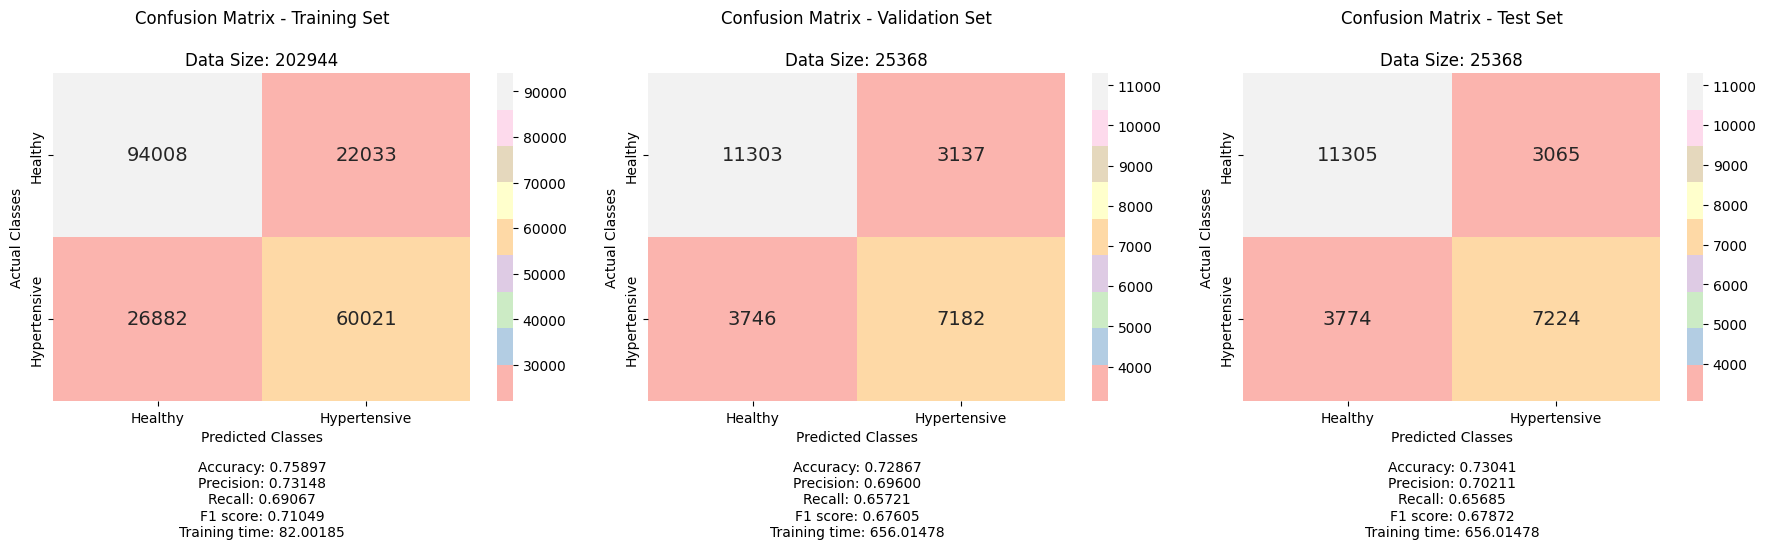

In [31]:
# División de los datos en conjunto de entrenamiento (80%), conjunto de validación (10%) y conjunto de pruebas (10%)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Entrena y evalúa un modelo XGBoost.

    Args:
    - x_train (array): Características de entrenamiento.
    - y_train (array): Etiquetas de entrenamiento.
    - x_val (array): Características de validación.
    - y_val (array): Etiquetas de validación.
    - x_test (array): Características de prueba.
    - y_test (array): Etiquetas de prueba.

    Returns:
    - model_xgb (XGBClassifier): Modelo entrenado de XGBoost.
    - results (dict): Resultados de la evaluación en conjuntos de entrenamiento, validación y prueba.
    - confusion_matrices (tuple): Matrices de confusión para conjuntos de entrenamiento, validación y prueba.
    """
    start_time = time.time()
    # Inicialización del modelo XGBoost
    model_xgb = XGBClassifier(
        n_estimators=500,     # Número de árboles en el bosque
        max_depth=7,          # Profundidad máxima de cada árbol
        learning_rate=0.1,    # Tasa de aprendizaje (factor de escala para la actualización del peso)
        subsample=0.7,        # Proporción de muestras utilizadas para entrenar cada árbol
        colsample_bytree=0.7, # Proporción de características utilizadas para entrenar cada árbol
        random_state=42       # Semilla aleatoria para reproducibilidad
    )
    # Entrenamiento del modelo
    model_xgb.fit(x_train, y_train)
    end_time = time.time()
    training_time = round((end_time - start_time) * 1e6)

    # Función para evaluar el modelo
    def evaluate(x, y):
        preds = model_xgb.predict(x)
        # Cálculo de métricas de evaluación
        accuracy = accuracy_score(y, preds)
        precision = precision_score(y, preds)
        recall = recall_score(y, preds)
        f1 = f1_score(y, preds)
        confusion_mat = confusion_matrix(y, preds)
        return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}, confusion_mat

    # Evaluación del modelo en conjuntos de entrenamiento, validación y prueba
    train_results, confusion_mat_train = evaluate(x_train, y_train)
    val_results, confusion_mat_val = evaluate(x_val, y_val)
    test_results, confusion_mat_test = evaluate(x_test, y_test)

    # Almacenamiento de resultados en un diccionario
    results = {
        'Train': {**train_results, 'Training time': training_time / len(x_train)},
        'Validation': {**val_results, 'Training time': training_time / len(x_val)},
        'Test': {**test_results, 'Training time': training_time / len(x_test)}
    }

    return model_xgb, results, (confusion_mat_train, confusion_mat_val, confusion_mat_test)

# Entrena y evalúa el modelo XGBoost sin SMOTE
model_xgb_sinsmote, results_xgb_sinsmote, confusion_matrices = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Crea DataFrame para los resultados
results_df = pd.DataFrame(results_without_smote).T

# Gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, confusion_mat, results) in zip(axes, [('Training Set', confusion_matrices[0], results_xgb_sinsmote['Train']),
                                                       ('Validation Set', confusion_matrices[1], results_xgb_sinsmote['Validation']),
                                                       ('Test Set', confusion_matrices[2], results_xgb_sinsmote['Test'])]):
    sns.heatmap(confusion_mat, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=['Healthy', 'Hypertensive'], yticklabels=['Healthy', 'Hypertensive'], ax=ax)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
    ax.set_title(f'Confusion Matrix - {title}\n\nData Size: {len(x_val) if "Validation" in title else len(x_test) if "Test" in title else len(x_train)}')
    result_text = '\n'.join([f"{metric}: {value:.5f}" for metric, value in results.items()])
    ax.text(0.5, -0.3, result_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

#### Entrenamiento con datos balanceados (SMOTE)

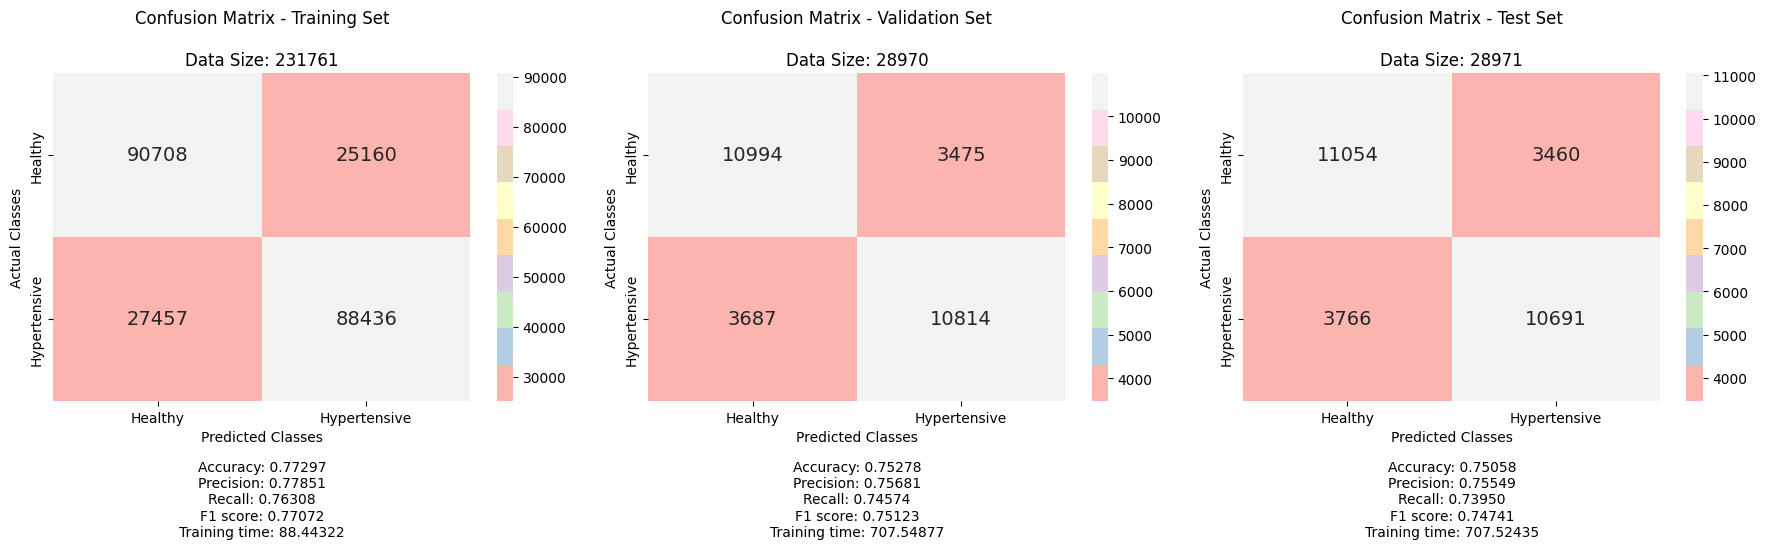

In [32]:
# División de los datos en conjunto de entrenamiento (80%), conjunto de validación (10%) y conjunto de pruebas (10%)
x_train, x_temp, y_train, y_temp = train_test_split(x_sm, y_sm, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Entrena y evalúa un modelo XGBoost.

    Args:
    - x_train (array): Características de entrenamiento.
    - y_train (array): Etiquetas de entrenamiento.
    - x_val (array): Características de validación.
    - y_val (array): Etiquetas de validación.
    - x_test (array): Características de prueba.
    - y_test (array): Etiquetas de prueba.

    Returns:
    - model_xgb (XGBClassifier): Modelo entrenado de XGBoost.
    - results (dict): Resultados de la evaluación en conjuntos de entrenamiento, validación y prueba.
    - confusion_matrices (tuple): Matrices de confusión para conjuntos de entrenamiento, validación y prueba.
    """
    start_time = time.time()
    # Inicialización del modelo XGBoost
    model_xgb = XGBClassifier(
        n_estimators=500,     # Número de árboles en el bosque
        max_depth=7,          # Profundidad máxima de cada árbol
        learning_rate=0.1,    # Tasa de aprendizaje (factor de escala para la actualización del peso)
        subsample=0.7,        # Proporción de muestras utilizadas para entrenar cada árbol
        colsample_bytree=0.7, # Proporción de características utilizadas para entrenar cada árbol
        random_state=42       # Semilla aleatoria para reproducibilidad
    )
    # Entrenamiento del modelo
    model_xgb.fit(x_train, y_train)
    end_time = time.time()
    training_time = round((end_time - start_time) * 1e6)

    # Función para evaluar el modelo
    def evaluate(x, y):
        preds = model_xgb.predict(x)
        # Cálculo de métricas de evaluación
        accuracy = accuracy_score(y, preds)
        precision = precision_score(y, preds)
        recall = recall_score(y, preds)
        f1 = f1_score(y, preds)
        confusion_mat = confusion_matrix(y, preds)
        return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}, confusion_mat

    # Evaluación del modelo en conjuntos de entrenamiento, validación y prueba
    train_results, confusion_mat_train = evaluate(x_train, y_train)
    val_results, confusion_mat_val = evaluate(x_val, y_val)
    test_results, confusion_mat_test = evaluate(x_test, y_test)

    # Almacenamiento de resultados en un diccionario
    results = {
        'Train': {**train_results, 'Training time': training_time / len(x_train)},
        'Validation': {**val_results, 'Training time': training_time / len(x_val)},
        'Test': {**test_results, 'Training time': training_time / len(x_test)}
    }

    return model_xgb, results, (confusion_mat_train, confusion_mat_val, confusion_mat_test)

# Entrena y evalúa el modelo XGBoost
model_xgb_smote, results_xgb_smote, confusion_matrices = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Crea DataFrame para los resultados
results_df = pd.DataFrame(results_with_smote).T

# Gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, confusion_mat, results) in zip(axes, [('Training Set', confusion_matrices[0], results_xgb_smote['Train']),
                                                       ('Validation Set', confusion_matrices[1], results_xgb_smote['Validation']),
                                                       ('Test Set', confusion_matrices[2], results_xgb_smote['Test'])]):
    sns.heatmap(confusion_mat, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=['Healthy', 'Hypertensive'], yticklabels=['Healthy', 'Hypertensive'], ax=ax)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
    ax.set_title(f'Confusion Matrix - {title}\n\nData Size: {len(x_val) if "Validation" in title else len(x_test) if "Test" in title else len(x_train)}')
    result_text = '\n'.join([f"{metric}: {value:.5f}" for metric, value in results.items()])
    ax.text(0.5, -0.3, result_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

## Evaluación del modelo


### Resultado de entrenamiento de modelos

In [33]:
# Define el diccionario para almacenar todos los resultados
results_without_smote = {}
results_with_smote = {}

# Lista de modelos y sus resultados correspondientes
model_results = {
    'Random Forest': (results_rf_sinsmote, results_rf_smote),
    'K-Nearest Neighbors': (results_knn_sinsmote, results_knn_smote),
    'Decision Tree': (results_dt_sinsmote, results_dt_smote),
    'Logistic Regression': (results_lr_sinsmote, results_lr_smote),
    'XGBoost': (results_xgb_sinsmote, results_xgb_smote)
}

# Iterar sobre los modelos y sus resultados
for model_name, (model_result_sinsmote, model_result_smote) in model_results.items():
    # Resultados SIN SMOTE
    results_without_smote[model_name] = {
        'Train': model_result_sinsmote['Train'],
        'Validation': model_result_sinsmote['Validation'],
        'Test': model_result_sinsmote['Test']
    }

    # Resultados CON SMOTE
    results_with_smote[model_name] = {
        'Train': model_result_smote['Train'],
        'Validation': model_result_smote['Validation'],
        'Test': model_result_smote['Test']
    }

# Convertir el diccionario de resultados SIN SMOTE en un DataFrame de Pandas
results_df_sinsmote = pd.DataFrame(results_without_smote).stack().apply(pd.Series)

# Convertir el diccionario de resultados CON SMOTE en un DataFrame de Pandas
results_df_smote = pd.DataFrame(results_with_smote).stack().apply(pd.Series)

# Mostrar el DataFrame SIN SMOTE
print("Resultados SIN SMOTE:")
print(results_df_sinsmote)

# Mostrar el DataFrame CON SMOTE
print("\nResultados CON SMOTE:")
print(results_df_smote)


Resultados SIN SMOTE:
                                Accuracy  Precision    Recall  F1 score  \
Train      Random Forest        0.925354   0.935411  0.886920  0.910520   
           K-Nearest Neighbors  0.774854   0.751609  0.708295  0.729310   
           Decision Tree        0.747531   0.726474  0.658251  0.690682   
           Logistic Regression  0.726939   0.700215  0.633580  0.665233   
           XGBoost              0.758973   0.731482  0.690667  0.710488   
Validation Random Forest        0.702026   0.660904  0.633144  0.646726   
           K-Nearest Neighbors  0.679518   0.638105  0.591508  0.613923   
           Decision Tree        0.705456   0.676183  0.606881  0.639660   
           Logistic Regression  0.728556   0.704555  0.636988  0.669070   
           XGBoost              0.728674   0.695998  0.657211  0.676048   
Test       Random Forest        0.702420   0.663413  0.636570  0.649715   
           K-Nearest Neighbors  0.685549   0.648481  0.599836  0.623211   
   

In [34]:
# Define el diccionario para almacenar todos los resultados
results_without_smote = {}
results_with_smote = {}

# Lista de modelos y sus resultados correspondientes
model_results = {
    'Random Forest': (results_rf_sinsmote, results_rf_smote),
    'K-Nearest Neighbors': (results_knn_sinsmote, results_knn_smote),
    'Decision Tree': (results_dt_sinsmote, results_dt_smote),
    'Logistic Regression': (results_lr_sinsmote, results_lr_smote),
    'XGBoost': (results_xgb_sinsmote, results_xgb_smote)
}

# Iterar sobre los modelos y sus resultados
for model_name, (model_result_sinsmote, model_result_smote) in model_results.items():
    # Resultados SIN SMOTE
    results_without_smote[model_name] = {
        'Train': model_result_sinsmote['Train']['Accuracy'],
        'Validation': model_result_sinsmote['Validation']['Accuracy'],
        'Test': model_result_sinsmote['Test']['Accuracy']
    }
    
    # Resultados CON SMOTE
    results_with_smote[model_name] = {
        'Train': model_result_smote['Train']['Accuracy'],
        'Validation': model_result_smote['Validation']['Accuracy'],
        'Test': model_result_smote['Test']['Accuracy']
    }

# Convertir el diccionario de resultados SIN SMOTE en un DataFrame de Pandas
results_df_sinsmote = pd.DataFrame(results_without_smote)

# Convertir el diccionario de resultados CON SMOTE en un DataFrame de Pandas
results_df_smote = pd.DataFrame(results_with_smote)

# Calcular la media de las métricas para cada modelo SIN SMOTE
mean_results_sinsmote = results_df_sinsmote.mean()

# Calcular la media de las métricas para cada modelo CON SMOTE
mean_results_smote = results_df_smote.mean()

### Mejor Algoritmo

In [35]:
# Encontrar el modelo con el mejor resultado para cada conjunto de datos
best_model_sinsmote_name = mean_results_sinsmote.idxmax()
best_model_smote_name = mean_results_smote.idxmax()

# Mostrar el modelo con el mejor resultado para cada conjunto de datos
print("Mejor modelo SIN SMOTE:")
print(best_model_sinsmote_name)
print("Métricas de rendimiento:")
print(results_df_sinsmote.loc[:, best_model_sinsmote_name])

print("\nMejor modelo CON SMOTE:")
print(best_model_smote_name)
print("Métricas de rendimiento:")
print(results_df_smote.loc[:, best_model_smote_name])

Mejor modelo SIN SMOTE:
Random Forest
Métricas de rendimiento:
Train         0.925354
Validation    0.702026
Test          0.702420
Name: Random Forest, dtype: float64

Mejor modelo CON SMOTE:
Random Forest
Métricas de rendimiento:
Train         0.928849
Validation    0.730652
Test          0.730075
Name: Random Forest, dtype: float64


### Peor Algoritmo

In [36]:
# Encontrar el modelo con el peor resultado para cada conjunto de datos
worst_model_sinsmote_name = mean_results_sinsmote.idxmin()
worst_model_smote_name = mean_results_smote.idxmin()

# Mostrar el modelo con el peor resultado para cada conjunto de datos
print("Peor modelo SIN SMOTE:")
print(worst_model_sinsmote_name)
print("Métricas de rendimiento:")
print(results_df_sinsmote.loc[:, worst_model_sinsmote_name])

print("\nPeor modelo CON SMOTE:")
print(worst_model_smote_name)
print("Métricas de rendimiento:")
print(results_df_smote.loc[:, worst_model_smote_name])

Peor modelo SIN SMOTE:
K-Nearest Neighbors
Métricas de rendimiento:
Train         0.774854
Validation    0.679518
Test          0.685549
Name: K-Nearest Neighbors, dtype: float64

Peor modelo CON SMOTE:
Logistic Regression
Métricas de rendimiento:
Train         0.723504
Validation    0.724163
Test          0.720859
Name: Logistic Regression, dtype: float64


### Datos de entrada


In [37]:
# Grupo de edad => [1: 18-24] [2: 25-29] [3: 30-34] [4: 35-39] [5: 40-44] [6: 45-49] [7: 50-54] [8: 55-59] [9: 60-64] [10: 65-69] [11: 70-74] [12: 75-79] [13: 80-100]
Age = 8
Sex = 1 #[Hombre = 0, Mujer = 1]
BMI = 34.0
GenHlth = 2 # [Excelente = 1] [Muy bueno = 2] [Bueno = 3] [Regular = 4] [Deficiente = 5]
MentHlth = 0
PhysHlth = 0
DiffWalk = 0 # [Si = 1 | No = 0]
Fruits = 0 # [Si = 1 | No = 0]
Veggies = 0 # [Si = 1 | No = 0]
Smoker = 1 # [Si = 1 | No = 0]
HvyAlcoholConsump = 0 # [Si = 1 | No = 0]
PhysActivity = 1 # [Si = 1 | No = 0]
HighChol = 1 # [Si = 1 | No = 0]
CholCheck = 1 # [Si = 1 | No = 0]
Diabetes = 0 # Sin diabetes = 0 | Prediabetes = 1 | Diabetes = 2
Stroke = 1 # [Si = 1 | No = 0]
HeartDiseaseorAttack = 0 # [Si = 1 | No = 0]

# Crea el array xnew con los valores definidos
xnew = np.array([[Age, Sex, BMI, GenHlth, MentHlth, PhysHlth, DiffWalk, 
                  Fruits, Veggies, Smoker, HvyAlcoholConsump, PhysActivity, 
                  HighChol, CholCheck, Diabetes, Stroke, HeartDiseaseorAttack]
                ])

# Realiza la predicción utilizando el modelo entrenado
ynew = model_rf_smote.predict(xnew)

# Imprime los resultados de la predicción
if ynew[0] == 0:
    mensaje = 'Felicidades!!!\nNo eres propenso a desarrollar hipertensión arterial.'
else:
    mensaje = 'A tomar precauciones!!!\nEres un paciente propenso a desarrollar hipertensión arterial.'
print(f'input_data = {xnew[0]} \nPredicted = {ynew[0]}')
print(mensaje)

input_data = [ 8.  1. 34.  2.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  0.] 
Predicted = 1
A tomar precauciones!!!
Eres un paciente propenso a desarrollar hipertensión arterial.


## Exportar modelo


In [38]:
# Muestra los datos del conjunto de prueba en forma de DataFrame
df_x_test = pd.DataFrame(x_test, columns=DF.columns[:-1])  # Sin eliminar la columna 'Hypertension'

# Agrega la columna 'Hypertension' al DataFrame df_x_test
df_x_test['Hypertension'] = y_test

# Configura pandas para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)

# Exporta el DataFrame a un archivo CSV
df_x_test.to_csv('x_test_data.csv', index=False)

# Muestra una muestra aleatoria de 10 filas del DataFrame df_x_test
df_x_test.head(10)


,Age,Sex,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Fruits,Veggies,Smoker,HvyAlcoholConsump,PhysActivity,HighChol,CholCheck,Diabetes,Stroke,HeartDiseaseorAttack,Hypertension
0,11.0,1.0,37.0,5.0,0.0,30.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,10.0,0.0,23.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN
2,10.0,0.0,30.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,NaN
3,11.0,1.0,25.0,2.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN
4,6.0,0.0,17.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN
5,4.0,0.0,25.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
6,4.0,0.0,33.0,4.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN
7,9.0,1.0,32.0,3.0,0.0,21.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
8,11.0,1.0,25.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN
9,8.0,1.0,34.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN


In [39]:
# Guarda el modelo
pickle.dump(model_rf_smote, open('hypertension_model.pkl', 'wb'))
print('Modelo exportado')

Modelo exportado
